# Threshold-based Policy Making Framework For Virginia Health Opportunity
### ML4VA - University of Virginia Fall 2023 CS-4774 Machine Learning Course Project Presented by Zhiyuan Song, Zihan Mei, and Liran Li
![Virginia](https://www.osano.com/hubfs/assets/blogs/featured/Virginia%20road%20sign.jpg)

# Project summery

This Project aims to improve health opportunities in Virginia State using machine learning. We wish to give different people different suggestions to improve their health conditions at the end of this project.

## Data
Our primary data is the Health Opportunity Index from the Virginia Open Data Portal. We first import the data and make some visualizations.

In [ ]:
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
np.random.seed(42)

def load_health_data():
    health = pd.read_csv('Health_Opportunity_Index.csv')
    return health

health = load_health_data()
# Display the first n rows of the data. (n=5 by default, we will use 10 rows)
health.head(10)

,Census Tract,Rural~Urban,Access to Care,Employment Accessibility,Affordability,Air Quality,Population Churning,Education,Food Accessibility,Income Inequality,Job Participation,Population Density,Segregation,Material Deprivation,Walkability,Community Environment Profile,Consumer Opportunity Profile,Economic Opportunity Profile,Wellness Disparity Profile,Health Opportunity Index
0,51650011400,Urban,0.486042,0.015251,0.043043,0.730782,0.468193,0.630734,0.977517,0.034818,0.150,0.043334,0.770141,0.000000,0.245825,0.540012,0.390787,0.006034,0.409863,0.000000
1,51760040300,Urban,0.502987,0.042804,0.641642,0.351528,0.022901,0.871575,0.933302,0.082321,0.373,0.227476,0.639438,0.133458,0.307647,0.777319,0.764695,0.033064,0.488495,0.015558
2,51013101701,Urban,0.432198,0.131224,0.627628,0.800711,0.513995,0.853716,0.933302,0.395412,0.759,1.000000,0.801044,0.343863,0.731265,1.000000,0.827284,0.326435,0.355932,0.032861
3,51710002500,Urban,0.465814,0.041683,0.021021,0.754040,0.444020,0.697862,0.741324,0.258974,0.436,0.113065,0.919320,0.228861,0.321052,0.561143,0.302549,0.183497,0.319484,0.077873
4,51760040400,Urban,0.502987,0.084305,0.662663,0.382158,0.427481,0.800714,0.933302,0.000000,0.551,0.231267,0.822681,0.184284,0.326225,0.719178,0.773519,0.075911,0.395098,0.085121
5,51013101403,Urban,0.466760,0.122853,0.660661,0.783266,0.582697,0.902432,0.933302,0.475169,0.779,0.850841,0.819582,0.386328,0.966011,0.979486,0.880676,0.346453,0.370990,0.091417
6,51760030500,Urban,0.502987,0.078102,0.095095,0.318559,0.487277,0.826806,0.941391,0.067072,0.570,0.139733,0.657463,0.219839,0.355501,0.678451,0.556790,0.096728,0.479308,0.094073
7,51710002600,Urban,0.464126,0.055761,0.103103,0.772861,0.412214,0.787143,0.853912,0.281511,0.500,0.110549,0.869243,0.237509,0.478809,0.611398,0.450862,0.189756,0.343811,0.101564
8,51680000600,Urban,0.348758,0.056909,0.179179,0.728652,0.530534,0.612450,0.519663,0.282726,0.526,0.067439,0.917101,0.196962,0.389167,0.533341,0.169058,0.247614,0.237614,0.102881
9,51003010902,Urban,0.663602,0.033116,0.191191,0.748167,0.178117,0.829620,0.983471,0.284615,0.303,0.161625,0.949075,0.338967,0.155925,0.587314,0.598883,0.119759,0.444563,0.104454


In [ ]:
# Find out the size of the dataset in terms of MB by using os library
health_size_info = os.stat('Health_Opportunity_Index.csv')
health_size= health_size_info.st_size / (1024**2)
print(f"The dataset is {health_size} MB")

The dataset is 0.4716930389404297 MB


In [ ]:
# Find the number of entries in the dataset
print(f"The dataset have {health.shape[0]} entries (rows)")

The dataset have 1875 entries (rows)


In [ ]:
# Find the number of features in the dataset
print(f"The dataset have {health.shape[1]} features (columns)")

The dataset have 20 features (columns)


In [ ]:
# Find all columns
health_col=health.columns
# Find columns that are numeric
health_numeric= health._get_numeric_data().columns
# Find columns that are catagorical
health_cat=list(set(health_col)-set(health_numeric))
print(f"The dataset do contains catagorical data. They are {health_cat}")

The dataset do contains catagorical data. They are ['Rural~Urban']


In [ ]:
# Find the number of missing values
missing = health.isnull().sum()
print(f"The dataset do not have missing values. The number of missing values are {missing.sum()}.")

The dataset do not have missing values. The number of missing values are 0.


In [ ]:
# Provide some basic statistics about the dataset
health.describe()

,Census Tract,Access to Care,Employment Accessibility,Affordability,Air Quality,Population Churning,Education,Food Accessibility,Income Inequality,Job Participation,Population Density,Segregation,Material Deprivation,Walkability,Community Environment Profile,Consumer Opportunity Profile,Economic Opportunity Profile,Wellness Disparity Profile,Health Opportunity Index
count,1.875000e+03,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000
mean,5.129765e+10,0.430293,0.100788,0.541067,0.826108,0.821509,0.738404,0.932584,0.467536,0.659006,0.043494,0.735817,0.456662,0.183523,0.351329,0.620942,0.296378,0.387827,0.422507
std,2.972937e+08,0.122966,0.040566,0.130588,0.109615,0.125996,0.079122,0.074521,0.088873,0.113889,0.066599,0.172272,0.142174,0.106976,0.089182,0.131028,0.060072,0.124507,0.089592
min,5.100109e+10,0.000000,0.000000,0.000000,0.000000,0.022901,0.000000,0.313483,0.000000,0.000000,0.000001,0.000000,0.000000,0.000678,0.000000,0.000000,0.006034,0.000000,0.000000
25%,5.105948e+10,0.363984,0.084459,0.473473,0.764383,0.768448,0.681429,0.933302,0.415655,0.599000,0.003532,0.668347,0.366538,0.105048,0.284778,0.546642,0.260002,0.312137,0.368180
50%,5.114985e+10,0.458326,0.105232,0.558559,0.850917,0.853690,0.730412,0.942139,0.475169,0.667000,0.027831,0.760790,0.457951,0.166149,0.334323,0.622990,0.303343,0.383706,0.427082
75%,5.165001e+10,0.502987,0.121596,0.636637,0.904748,0.908397,0.792474,0.976872,0.529150,0.735000,0.055554,0.847383,0.551325,0.252531,0.402707,0.709174,0.336892,0.456334,0.483719
max,5.184000e+10,1.000000,0.696429,0.827828,1.000000,1.000000,1.000000,1.000000,0.907557,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.867737,1.000000,0.728815


We can visualize from above that the data has both numerical and categorical features. We see that our data has no missing data.

In [ ]:
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1875 entries, 0 to 1874
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Census Tract                   1875 non-null   int64  
 1   Rural~Urban                    1875 non-null   object 
 2   Access to Care                 1875 non-null   float64
 3   Employment Accessibility       1875 non-null   float64
 4   Affordability                  1875 non-null   float64
 5   Air Quality                    1875 non-null   float64
 6   Population Churning            1875 non-null   float64
 7   Education                      1875 non-null   float64
 8   Food Accessibility             1875 non-null   float64
 9   Income Inequality              1875 non-null   float64
 10  Job Participation              1875 non-null   float64
 11  Population Density             1875 non-null   float64
 12  Segregation                    1875 non-null   f

In [ ]:
# View the counts of each value in the "Rural~Urban" feature
health["Rural~Urban"].value_counts()

Urban    1695
Rural     180
Name: Rural~Urban, dtype: int64

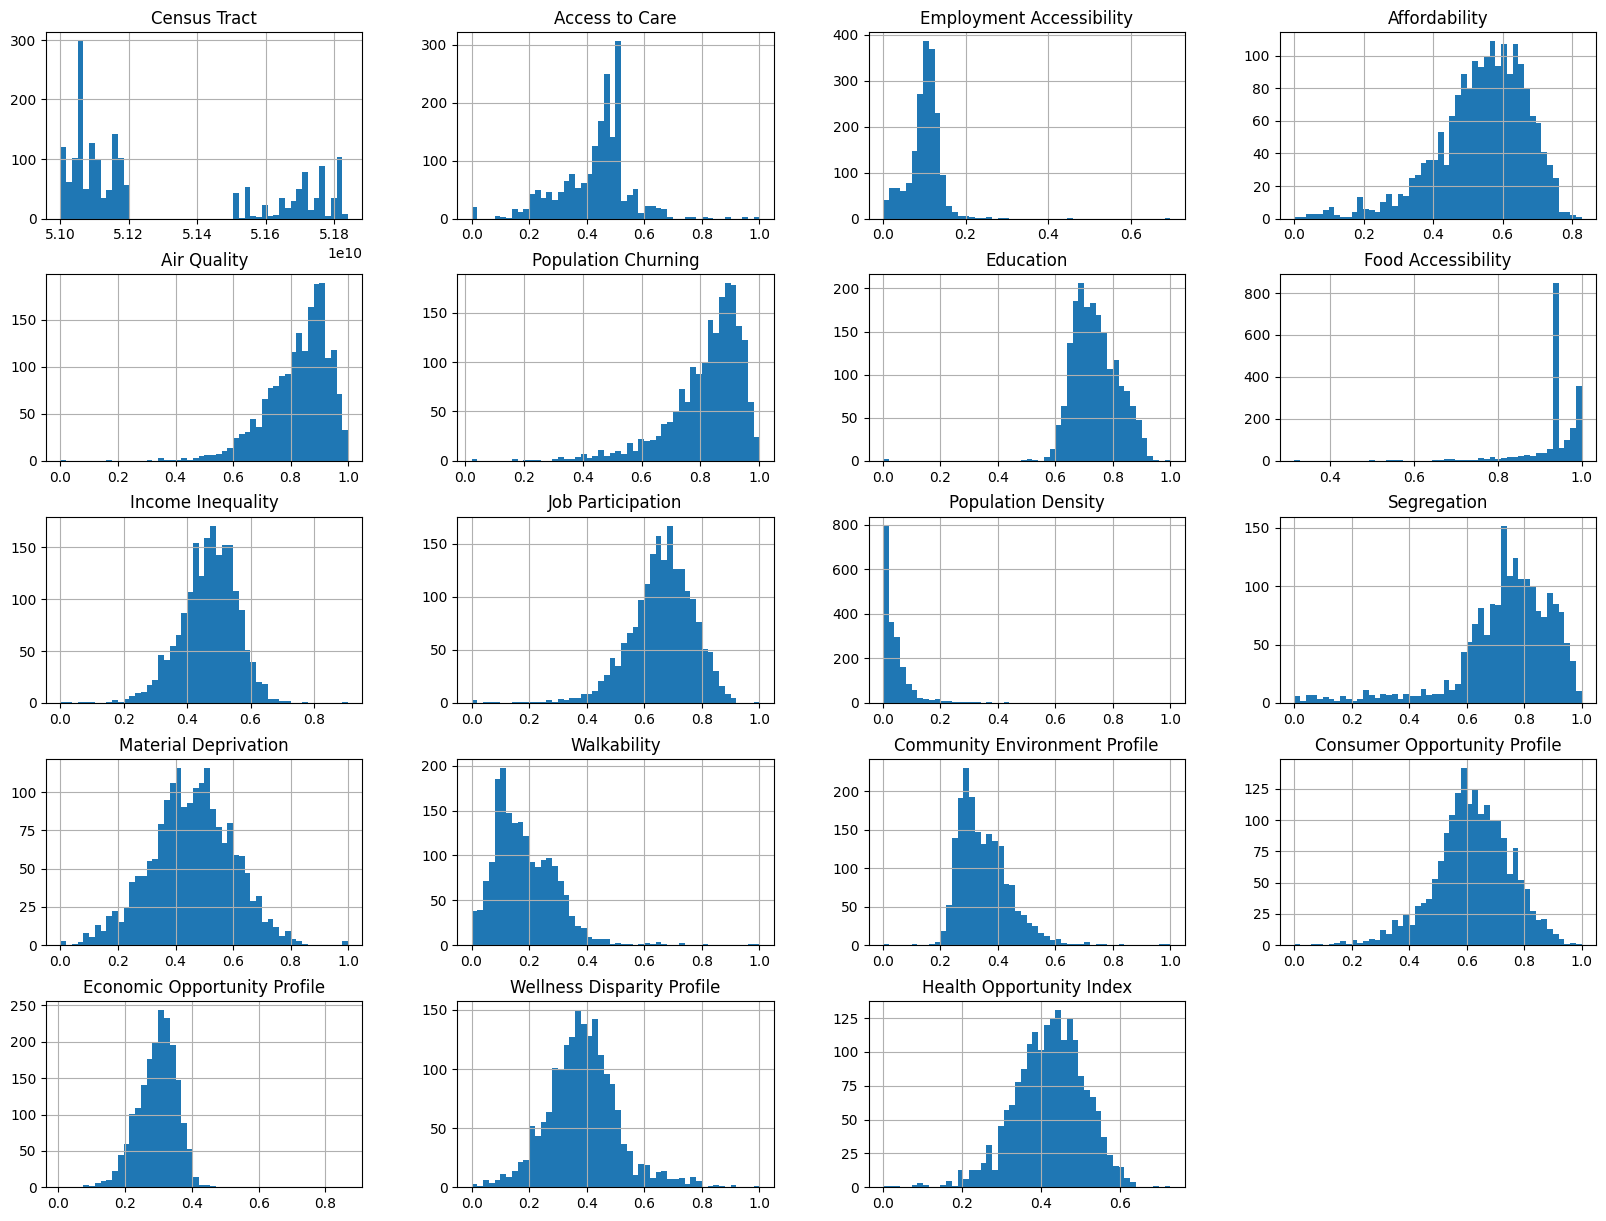

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
health.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
corr_matrix = health.corr()
# Let's look at how much each feature correlates to the house saleprice
important_corrs=corr_matrix["Health Opportunity Index"].sort_values(ascending=False)
attributes = list(important_corrs[:5].index)
important_corrs

<ipython-input-14-117b4329b39d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = health.corr()


Health Opportunity Index         1.000000
Material Deprivation             0.738690
Income Inequality                0.619091
Affordability                    0.604075
Economic Opportunity Profile     0.565721
Population Churning              0.518123
Consumer Opportunity Profile     0.478957
Job Participation                0.398431
Employment Accessibility         0.378699
Wellness Disparity Profile       0.356095
Education                        0.346378
Air Quality                      0.305778
Access to Care                   0.265758
Food Accessibility               0.241796
Segregation                     -0.241036
Walkability                     -0.276103
Population Density              -0.320325
Census Tract                    -0.321442
Community Environment Profile   -0.605013
Name: Health Opportunity Index, dtype: float64

## K-Means

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
health_num = health.drop(columns=["Health Opportunity Index", "Rural~Urban","Census Tract"], axis=1)
imputer.fit(health_num)
X = imputer.transform(health_num)

In [ ]:
health_cat = health[["Rural~Urban"]]
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder(handle_unknown='ignore')
health_cat_1hot = cat_encoder.fit_transform(health_cat)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

health_num_tr = num_pipeline.fit_transform(health_num)

In [ ]:
from sklearn.compose import ColumnTransformer

num_attribs = list(health_num)
cat_attribs = ["Rural~Urban"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(handle_unknown='ignore'), cat_attribs),
    ])

health_prepared = full_pipeline.fit_transform(health)

In [ ]:
print(health.shape)
print(health_prepared.shape)

(1875, 20)
(1875, 19)


In [ ]:
health.head(10)

,Census Tract,Rural~Urban,Access to Care,Employment Accessibility,Affordability,Air Quality,Population Churning,Education,Food Accessibility,Income Inequality,Job Participation,Population Density,Segregation,Material Deprivation,Walkability,Community Environment Profile,Consumer Opportunity Profile,Economic Opportunity Profile,Wellness Disparity Profile,Health Opportunity Index
0,51650011400,Urban,0.486042,0.015251,0.043043,0.730782,0.468193,0.630734,0.977517,0.034818,0.150,0.043334,0.770141,0.000000,0.245825,0.540012,0.390787,0.006034,0.409863,0.000000
1,51760040300,Urban,0.502987,0.042804,0.641642,0.351528,0.022901,0.871575,0.933302,0.082321,0.373,0.227476,0.639438,0.133458,0.307647,0.777319,0.764695,0.033064,0.488495,0.015558
2,51013101701,Urban,0.432198,0.131224,0.627628,0.800711,0.513995,0.853716,0.933302,0.395412,0.759,1.000000,0.801044,0.343863,0.731265,1.000000,0.827284,0.326435,0.355932,0.032861
3,51710002500,Urban,0.465814,0.041683,0.021021,0.754040,0.444020,0.697862,0.741324,0.258974,0.436,0.113065,0.919320,0.228861,0.321052,0.561143,0.302549,0.183497,0.319484,0.077873
4,51760040400,Urban,0.502987,0.084305,0.662663,0.382158,0.427481,0.800714,0.933302,0.000000,0.551,0.231267,0.822681,0.184284,0.326225,0.719178,0.773519,0.075911,0.395098,0.085121
5,51013101403,Urban,0.466760,0.122853,0.660661,0.783266,0.582697,0.902432,0.933302,0.475169,0.779,0.850841,0.819582,0.386328,0.966011,0.979486,0.880676,0.346453,0.370990,0.091417
6,51760030500,Urban,0.502987,0.078102,0.095095,0.318559,0.487277,0.826806,0.941391,0.067072,0.570,0.139733,0.657463,0.219839,0.355501,0.678451,0.556790,0.096728,0.479308,0.094073
7,51710002600,Urban,0.464126,0.055761,0.103103,0.772861,0.412214,0.787143,0.853912,0.281511,0.500,0.110549,0.869243,0.237509,0.478809,0.611398,0.450862,0.189756,0.343811,0.101564
8,51680000600,Urban,0.348758,0.056909,0.179179,0.728652,0.530534,0.612450,0.519663,0.282726,0.526,0.067439,0.917101,0.196962,0.389167,0.533341,0.169058,0.247614,0.237614,0.102881
9,51003010902,Urban,0.663602,0.033116,0.191191,0.748167,0.178117,0.829620,0.983471,0.284615,0.303,0.161625,0.949075,0.338967,0.155925,0.587314,0.598883,0.119759,0.444563,0.104454


In [ ]:
health_prepared[:10]

array([[ 4.53490353e-01, -2.10912876e+00, -3.81472814e+00,
        -8.69882389e-01, -2.80493494e+00, -1.36117889e+00,
         6.03113754e-01, -4.87024128e+00, -4.47051941e+00,
        -2.40147593e-03,  1.99295159e-01, -3.21285107e+00,
         5.82545152e-01,  2.11626088e+00, -1.75700087e+00,
        -4.83453269e+00,  1.77029170e-01,  0.00000000e+00,
         1.00000000e+00],
       [ 5.91323550e-01, -1.42972793e+00,  7.70375029e-01,
        -4.33068997e+00, -6.34006475e+00,  1.68356353e+00,
         9.64010026e-03, -4.33559108e+00, -2.51194507e+00,
         2.76326969e+00, -5.59603067e-01, -2.27390498e+00,
         1.16060521e+00,  4.77789243e+00,  1.09740139e+00,
        -4.38446071e+00,  8.08750626e-01,  0.00000000e+00,
         1.00000000e+00],
       [ 1.54910447e-02,  7.50489762e-01,  6.63031477e-01,
        -2.31755215e-01, -2.44132159e+00,  1.45778062e+00,
         9.64010026e-03, -8.11760210e-01,  8.78232931e-01,
         1.43659762e+01,  3.78732441e-01, -7.93599200e-01,
    

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

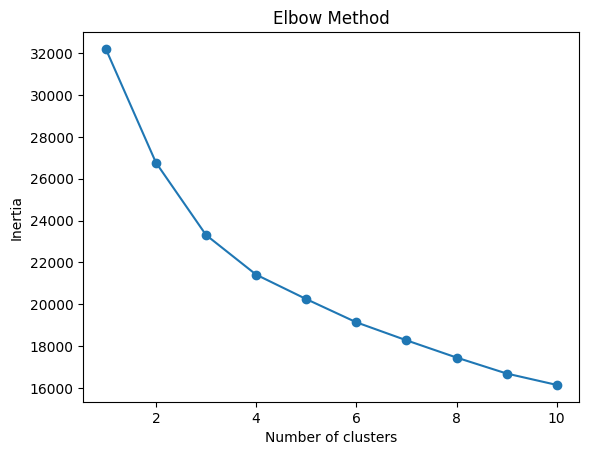

In [ ]:
from sklearn.cluster import KMeans

inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(health_prepared)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(health_prepared)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
health['Cluster'] = cluster_labels
for cluster in range(3):
    print(f"Cluster {cluster}:\n")
    print(health[health['Cluster'] == cluster].describe())
    print("="*60)

Cluster 0:

       Census Tract  Access to Care  Employment Accessibility  Affordability  \
count  5.450000e+02      545.000000                545.000000     545.000000   
mean   5.119359e+10        0.334624                  0.065385       0.491541   
std    2.193166e+08        0.126144                  0.037073       0.096022   
min    5.100109e+10        0.000000                  0.000000       0.063063   
25%    5.106502e+10        0.240492                  0.035021       0.437437   
50%    5.113302e+10        0.328633                  0.069856       0.500501   
75%    5.118186e+10        0.432362                  0.092378       0.554555   
max    5.183037e+10        0.679330                  0.448718       0.749750   

       Air Quality  Population Churning   Education  Food Accessibility  \
count   545.000000           545.000000  545.000000          545.000000   
mean      0.890586             0.864463    0.682353            0.921310   
std       0.052606             0.097904   

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(health_prepared)

# Define distinct colors for each cluster (you can adjust these as per the number of clusters you have)
colors = ['red', 'blue', 'green']  # Assuming you have 3 clusters

# Create a mapping of cluster labels to colors
cluster_colors = {i: colors[i] for i in range(len(colors))}

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each cluster with its corresponding color
for cluster in cluster_colors:
    mask = (cluster_labels == cluster)
    ax.scatter(principal_components[mask, 0], principal_components[mask, 1],
               color=cluster_colors[cluster], edgecolor='k', s=100, label=f'Cluster {cluster}')

# Add title and axis labels
ax.set_title('2D PCA of Health Clusters')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')

# Add legend
ax.legend(loc='best')

# Display the plot
plt.show()

NameError: name 'health_prepared' is not defined

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y = health["Health Opportunity Index"].values
X = health.drop(columns=["Health Opportunity Index", "Census Tract"], axis=1)

clusters = set(cluster_labels)

for cluster in clusters:
    # Isolate data for the cluster
    cluster_indices = [i for i, label in enumerate(cluster_labels) if label == cluster]


    X_cluster = X.loc[cluster_indices]
    y_cluster = y[cluster_indices]

    # Splitting the data
    X_train, X_test, y_train, y_test = train_test_split(X_cluster, y_cluster, test_size=0.2, random_state=42)
    X_train_prepared = full_pipeline.fit_transform(X_train)
    X_test_prepared = full_pipeline.transform(X_test)

    # Linear Regression
    lr = LinearRegression()
    lr.fit(X_train_prepared, y_train)
    y_pred_lr = lr.predict(X_test_prepared)
    mse_lr = mean_squared_error(y_test, y_pred_lr)
    mae_lr = mean_absolute_error(y_test, y_pred_lr)
    r2_lr = r2_score(y_test, y_pred_lr)

    # Decision Tree Regression
    dt = DecisionTreeRegressor()
    dt.fit(X_train_prepared, y_train)
    y_pred_dt = dt.predict(X_test_prepared)
    mse_dt = mean_squared_error(y_test, y_pred_dt)
    mae_dt = mean_absolute_error(y_test, y_pred_dt)
    r2_dt = r2_score(y_test, y_pred_dt)

    # Random Forest Regression
    rf = RandomForestRegressor()
    rf.fit(X_train_prepared, y_train)
    y_pred_rf = rf.predict(X_test_prepared)
    mse_rf = mean_squared_error(y_test, y_pred_rf)
    mae_rf = mean_absolute_error(y_test, y_pred_rf)
    r2_rf = r2_score(y_test, y_pred_rf)


    print(f"Cluster {cluster}:")
    print("Metrics for Linear Regression:")
    print("R-squared:", r2_lr)
    print("Mean Squared Error:", mse_lr)
    print("Root Mean Squared Error:", np.sqrt(mse_lr))
    print("Mean Absolute Error:", mae_lr)
    print("-"*30)

    print("Metrics for Decision Tree:")
    print("R-squared:", r2_dt)
    print("Mean Squared Error:", mse_dt)
    print("Root Mean Squared Error:", np.sqrt(mse_dt))
    print("Mean Absolute Error:", mae_dt)
    print("-"*30)

    print("Metrics for Random Forest:")
    print("R-squared:", r2_rf)
    print("Mean Squared Error:", mse_rf)
    print("Root Mean Squared Error:", np.sqrt(mse_rf))
    print("Mean Absolute Error:", mae_rf)
    print("="*50)

NameError: name 'cluster_labels' is not defined

## New Step

In [ ]:
def load_health_data():
    health = pd.read_csv('Health_Opportunity_Index.csv')
    return health
health_data = load_health_data()

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Assuming 'Rural~Urban' is the only categorical feature and 'Health Opportunity Index' is the target
num_attribs = list(health_data.drop(columns=["Health Opportunity Index", "Rural~Urban", "Census Tract"]))
cat_attribs = ["Rural~Urban"]

full_pipeline = ColumnTransformer([
    ("num", StandardScaler(), num_attribs),
    ("cat", OneHotEncoder(handle_unknown='ignore'), cat_attribs),
])

X = full_pipeline.fit_transform(health_data.drop("Health Opportunity Index", axis=1))
y = health_data["Health Opportunity Index"].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import tensorflow as tf
from tensorflow import keras


model = keras.models.Sequential([
      keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
      keras.layers.Dropout(0.2),
      keras.layers.Dense(64, activation='relu'),
      keras.layers.Dense(1)  # Output layer for regression
    ])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2560      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 10,881
Trainable params: 10,881
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='nadam', loss='mean_squared_error', metrics=[tf.keras.metrics.RootMeanSquaredError()])

history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
38/38 [==============================] - 7s 16ms/step - loss: 0.0771 - root_mean_squared_error: 0.2777 - val_loss: 0.0200 - val_root_mean_squared_error: 0.1414
Epoch 2/100
38/38 [==============================] - 0s 5ms/step - loss: 0.0295 - root_mean_squared_error: 0.1717 - val_loss: 0.0146 - val_root_mean_squared_error: 0.1210
Epoch 3/100
38/38 [==============================] - 0s 7ms/step - loss: 0.0196 - root_mean_squared_error: 0.1398 - val_loss: 0.0077 - val_root_mean_squared_error: 0.0879
Epoch 4/100
38/38 [==============================] - 0s 5ms/step - loss: 0.0135 - root_mean_squared_error: 0.1163 - val_loss: 0.0126 - val_root_mean_squared_error: 0.1120
Epoch 5/100
38/38 [==============================] - 0s 6ms/step - loss: 0.0101 - root_mean_squared_error: 0.1003 - val_loss: 0.0061 - val_root_mean_squared_error: 0.0778
Epoch 6/100
38/38 [==============================] - 0s 8ms/step - loss: 0.0092 - root_mean_squared_error: 0.0959 - val_loss: 0.0035 - val_root_

In [ ]:
test_loss = model.evaluate(X_test, y_test)
print('Test MSE:', test_loss)

12/12 [==============================] - 0s 2ms/step - loss: 7.7226e-05 - root_mean_squared_error: 0.0088
Test MSE: [7.722588634351268e-05, 0.00878782570362091]


In [ ]:
rmse = np.sqrt(1.7957e-04)
print("RMSE:", rmse)

RMSE: 0.013400373129133383


In [ ]:
from sklearn.model_selection import KFold

def build_model(input_shape):
    model = keras.models.Sequential([
        keras.layers.Dense(128, activation='relu', input_shape=(input_shape,)),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(1)  # Output layer for regression
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=[tf.keras.metrics.MeanSquaredError()])
    return model

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
fold_no = 1
mse_scores = []

for train_index, test_index in kfold.split(X):
    X_train_fold, X_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]

    model = build_model(X_train_fold.shape[1])
    model.fit(X_train_fold, y_train_fold, epochs=50, batch_size=32, verbose=0)  # Adjust epochs, batch_size as needed

    scores = model.evaluate(X_test_fold, y_test_fold, verbose=0)
    print(f"Fold {fold_no}, Mean Squared Error: {scores[1]}")
    mse_scores.append(scores[1])
    fold_no += 1

average_mse = sum(mse_scores) / len(mse_scores)
print(f"Average Mean Squared Error across all folds: {average_mse}")

Fold 1, Mean Squared Error: 9.211898577632383e-05
Fold 2, Mean Squared Error: 0.0004267547046765685
Fold 3, Mean Squared Error: 0.0001592422486282885
Fold 4, Mean Squared Error: 0.00016784248873591423
Fold 5, Mean Squared Error: 0.00014165762695483863
Average Mean Squared Error across all folds: 0.00019752321095438673


In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 3.6 MB/s eta 0:00:00


In [ ]:
import shap

# Select a random subset of data for SHAP analysis to reduce computation time
sample_indices = np.random.choice(X_train.shape[0], 100, replace=False)
X_sample = X_train[sample_indices]

# Create a SHAP explainer and calculate SHAP values
explainer = shap.DeepExplainer(model, X_sample)
shap_values = explainer.shap_values(X_sample)

# Plot the SHAP values
shap.summary_plot(shap_values[0], X_sample, feature_names=num_attribs + cat_attribs +["Health Opportunity Index"])

/usr/local/lib/python3.10/dist-packages/shap/explainers/_deep/deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")
/usr/local/lib/python3.10/dist-packages/keras/backend.py:452: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can tune the number of estimators
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Print the feature importances
feature_names = num_attribs + list(full_pipeline.named_transformers_['cat'].get_feature_names_out())
for name, importance in zip(feature_names, feature_importances):
    print(f"{name}: {importance}")

# Now, let's predict using the Random Forest model to see how well it performs
y_pred_rf = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(rf_mse)
print("Random Forest RMSE on Test Set:", rf_rmse)

In [ ]:
!pip3 install shap

In [ ]:
import shap

# Create a TreeExplainer for the random forest model
explainer = shap.TreeExplainer(rf_model)

# Select a random subset of data for SHAP analysis to reduce computation time
sample_indices = np.random.choice(X_train.shape[0], 100, replace=False)
X_sample = X_train[sample_indices]

# Compute SHAP values
shap_values = explainer.shap_values(X_sample)
shap.summary_plot(shap_values, X_sample, feature_names=num_attribs + cat_attribs +["Health Opportunity Index"])


In [ ]:
from sklearn.tree import DecisionTreeRegressor, export_text

# Train a single decision tree
simple_tree = DecisionTreeRegressor(max_depth=4, random_state=42)
simple_tree.fit(X_train, y_train)

# Convert the tree into decision rules
tree_rules = export_text(simple_tree, feature_names=feature_names)
print(tree_rules)

In [ ]:
pip install --upgrade scikit-learn

In [ ]:
from sklearn.tree import export_graphviz

# Export one of the trees in the Random Forest
export_graphviz(rf_model.estimators_[0], out_file='tree.dot', feature_names=feature_names)

# Convert to PNG using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

In [ ]:
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay

# Let's say you want to plot for the top 3 most important features
top_features = [feature_names.index('Material Deprivation'), feature_names.index('Community Environment Profile'), feature_names.index('Economic Opportunity Profile')]

fig, ax = plt.subplots(figsize=(14, 3))
PartialDependenceDisplay.from_estimator(rf_model, X_train, features=top_features, feature_names=feature_names, ax=ax)
plt.show()

In [ ]:
from sklearn.inspection import partial_dependence
if 'Census Tract' in feature_names:
    feature_names.remove('Census Tract')
for i in range(len(feature_names)-2):
  cur_name = feature_names[i]
  significance = 'significant' if abs( important_corrs[cur_name]) > 0.5 else 'secondary'
  median = np.median(X_train[i])
  #partial_dependence_values, grid = partial_dependence(rf_model, X_train, features=[i], grid_resolution=50)
  result = partial_dependence(rf_model, X_train, features=[i], grid_resolution=50)
  partial_dependence_values = result.average
  grid = result.values
  abs_partials = np.abs(partial_dependence_values)
  #max_partial = partial_dependence_values[argmax(abs_partials)]
  abs_partials = np.abs(partial_dependence_values)
  max_index = np.argmax(abs_partials)  # Use np.argmax to get the index of the maximum value
  #max_partial = partial_dependence_values[max_index]
  if len(partial_dependence_values.shape) == 2:
    row, col = np.unravel_index(max_index, partial_dependence_values.shape)
    max_partial = partial_dependence_values[row, col]
  else:
    max_partial = partial_dependence_values[max_index]
  if np.any(np.abs(max_partial) > 0.5):
    threshold = max_partial
  else:
    threshold = median
  print(cur_name + ':' + ' ' * (32 - len(cur_name)) + ('>' if important_corrs[cur_name] > 0 else '<') + '{:.2f}'.format(threshold) + ' ' * 5 + significance)


In [ ]:
# Pseudocode for a threshold-based rule
'''
if material_deprivation > high_deprivation_threshold:
    suggest('Implement material support programs')
elif community_env_profile < low_community_env_threshold:
    suggest('Improve community environment initiatives')
'''

In [ ]:
median_threshold = health_data['Economic Opportunity Profile'].median()
median_threshold

## New DataSet

In [ ]:
import pandas as pd

# Load the datasets
hoi_new = pd.read_csv('HOI_new.csv')
health_opportunity_index = pd.read_csv('Health_Opportunity_Index.csv')

In [ ]:
# Find the number of entries in the dataset
print(f"The dataset have {hoi_new.shape[0]} entries (rows)")

The dataset have 1908 entries (rows)


In [ ]:
# Find the number of features in the dataset
print(f"The dataset have {hoi_new.shape[1]} features (columns)")

The dataset have 268 features (columns)


In [ ]:
# Step 1: Extract the number after "US" from the "Geographic Identifier" in HOI_new.csv
hoi_new['Census Tract Match'] = hoi_new['Geographic Identifier'].str.extract(r'US(\d+)')

# Step 2: Perform the merge again using this newly extracted identifier against the "Census Tract" in Health_Opportunity_Index.csv
# Note: Ensure both columns are of the same data type for the merge
hoi_new['Census Tract Match'] = hoi_new['Census Tract Match'].astype(str)
health_opportunity_index['Census Tract'] = health_opportunity_index['Census Tract'].astype(str)

hoi_new_aligned = pd.merge(health_opportunity_index[['Census Tract']], hoi_new, left_on='Census Tract', right_on='Census Tract Match', how='inner')

# Step 3: Drop any empty columns and perform additional necessary cleaning
hoi_new_cleaned = hoi_new_aligned.dropna(axis=1, how='all')

# Removing the additional match column after verification
hoi_new_final = hoi_new_cleaned.drop(columns=['Census Tract Match'])

# Step 4: Verify the alignment and row count
final_row_count = hoi_new_final.shape[0]

# Since the final dataset from the previous step already includes the Census Tract alignment, we'll directly merge the HOI values
hoi_new_final_with_hoi = pd.merge(hoi_new_final, health_opportunity_index[['Census Tract', 'Health Opportunity Index']], left_on='Census Tract_x', right_on='Census Tract', how='left')

# Drop the duplicate Census Tract column from the merge operation
hoi_new_final_with_hoi.drop(columns=['Census Tract'], inplace=True)

# Drop the specified "rubbish" columns from the final dataset
columns_to_drop = [
    "FIPS", "Area Name","State/U.S.-Abbreviation (USPS)", "State/U.S.-Abbreviation (USPS)", "File Identification", "Qualifying Name", "State Postal Abbreviation",
    "Summary Level", "Geographic Component", "File identification",
    "Logical Record Number", "State (FIPS Code)", "County of current residence",
    "Census Tract_y", "Geographic Identifier", "Total Population.1"
]
# Drop these columns, being careful to only drop those that exist in the dataframe to avoid KeyError
hoi_new_final_cleaned = hoi_new_final_with_hoi.drop(columns=[col for col in columns_to_drop if col in hoi_new_final_with_hoi.columns])


# Combine several columns to simplify data
def sum_attr(row, col_names):
  sum = 0
  for col_name in col_names:
    sum += float(row[col_name])
  return sum


hoi_new_final_cleaned['% Households: Less than $30,000'] = hoi_new_final_cleaned.apply(lambda row: sum_attr(row,
    ["% Households: Less than $10,000", "% Households: $10,000 to $14,999",
     "% Households: $15,000 to $19,999", "% Households: $20,000 to $24,999",
     "% Households: $25,000 to $29,999"]
  ), axis=1)

hoi_new_final_cleaned['% Households: $30,000 to $99,999'] = hoi_new_final_cleaned.apply(lambda row: sum_attr(row,
    ["% Households: $30,000 to $34,999", "% Households: $35,000 to $39,999",
     "% Households: $40,000 to $44,999", "% Households: $45,000 to $49,999",
     "% Households: $50,000 to $59,999", "% Households: $60,000 to $74,999",
     "% Households: $75,000 to $99,999"]
  ), axis=1)


hoi_new_final_cleaned['% Households: $100,000 or More'] = hoi_new_final_cleaned.apply(lambda row: sum_attr(row,
    ["% Households: $100,000 to $124,999", "% Households: $125,000 to $149,999",
     "% Households: $150,000 to $199,999", "% Households: $200,000 or More"]
  ), axis=1)

hoi_new_final_cleaned['% Renter-Occupied Housing Units: Less than $1,000'] = hoi_new_final_cleaned.apply(lambda row: sum_attr(row,
    ["% Renter-Occupied Housing Units: Less than $300", "% Renter-Occupied Housing Units: $300 to $499",
     "% Renter-Occupied Housing Units: $500 to $799", "% Renter-Occupied Housing Units: $800 to $999"]
  ), axis=1)


hoi_new_final_cleaned['% Renter-Occupied Housing Units: $1,000 to $2,499'] = hoi_new_final_cleaned.apply(lambda row: sum_attr(row,
    ["% Renter-Occupied Housing Units: $1,000 to $1,499", "% Renter-Occupied Housing Units: $1,500 to $1,999",
     "% Renter-Occupied Housing Units: $2,000 to $2,499", "% Renter-Occupied Housing Units: $2,500 to $2,999"]
  ), axis=1)

columns_to_drop_after_aggregation = [
    "Households: Less than $10,000",
    "Households: $10,000 to $14,999",
    "Households: $15,000 to $19,999",
    "Households: $20,000 to $24,999",
    "Households: $25,000 to $29,999",
    "Households: $30,000 to $34,999",
    "Households: $35,000 to $39,999",
    "Households: $40,000 to $44,999",
    "Households: $45,000 to $49,999",
    "Households: $50,000 to $59,999",
    "Households: $60,000 to $74,999",
    "Households: $75,000 to $99,999",
    "Households: $100,000 to $124,999",
    "Households: $125,000 to $149,999",
    "Households: $150,000 to $199,999",
    "Households: $200,000 or More",
    "Renter-Occupied Housing Units: Less than $300",
    "Renter-Occupied Housing Units: $300 to $499",
    "Renter-Occupied Housing Units: $500 to $799",
    "Renter-Occupied Housing Units: $800 to $999",
    "Renter-Occupied Housing Units: $1,000 to $1,499",
    "Renter-Occupied Housing Units: $1,500 to $1,999",
    "Renter-Occupied Housing Units: $2,000 to $2,499",
    "Renter-Occupied Housing Units: $2,500 to $2,999",
]

hoi_new_final_cleaned_merged = hoi_new_final_cleaned.drop(columns=[col for col in columns_to_drop_after_aggregation if col in hoi_new_final_cleaned.columns])


# Specify additional columns to drop based on the extended list provided
columns_to_drop_extended = [
    "Area (Land).1",
    "Renter-Occupied Housing Units: Householder 15 to 24 Years",
    "Renter-Occupied Housing Units: Householder 25 to 34 Years",
    "Renter-Occupied Housing Units: Householder 35 to 44 Years",
    "Renter-Occupied Housing Units: Householder 45 to 54 Years",
    "Renter-Occupied Housing Units: Householder 55 to 59 Years",
    "Renter-Occupied Housing Units: Householder 60 to 64 Years",
    "Renter-Occupied Housing Units: Householder 65 to 74 Years",
    "Renter-Occupied Housing Units: Householder 75 to 84 Years",
    "Renter-Occupied Housing Units: Householder 85 Years and Over",
    "Population 3 Years and Over: Enrolled in School",
    "Population 3 Years and Over: Not Enrolled in School",
    "Civilian Population 16 to 19 Years: Not High School Graduate, Not Enrolled (Dropped Out)",
    "Civilian Population 16 to 19 Years: High School Graduate, or Enrolled (In School)",
    "Civilian Population in Labor Force 16 Years and Over: Employed",
    "Civilian Population in Labor Force 16 Years and Over: Unemployed",
    "Households: Less than $10,000",
    "Households: $10,000 to $14,999",
    "Households: $15,000 to $19,999",
    "Households: $20,000 to $24,999",
    "Households: $25,000 to $29,999",
    "Households: $30,000 to $34,999",
    "Households: $35,000 to $39,999",
    "Households: $40,000 to $44,999",
    "Households: $45,000 to $49,999",
    "Households: $50,000 to $59,999",
    "Households: $60,000 to $74,999",
    "Households: $75,000 to $99,999",
    "Households: $100,000 to $124,999",
    "Households: $125,000 to $149,999",
    "Households: $150,000 to $199,999",
    "Households: $200,000 or More",
    "Renter-Occupied Housing Units.1",
    "Renter-Occupied Housing Units: Less than $300",
    "Renter-Occupied Housing Units: $300 to $499",
    "Renter-Occupied Housing Units: $500 to $799",
    "Renter-Occupied Housing Units: $800 to $999",
    "Renter-Occupied Housing Units: $1,000 to $1,499",
    "Renter-Occupied Housing Units: $1,500 to $1,999",
    "Renter-Occupied Housing Units: $2,000 to $2,499",
    "Renter-Occupied Housing Units: $2,500 to $2,999",
    "Renter-Occupied Housing Units: $3,000 or More",
    "Renter-Occupied Housing Units: No Cash Rent",
    "Renter-Occupied Housing Units.2",
    "Renter-Occupied Housing Units: Less than $20,000",
    "Renter-Occupied Housing Units: Less than $20,000: Less than 20 Percent",
    "Renter-Occupied Housing Units: Less than $20,000: 20 to 29 Percent",
    "Renter-Occupied Housing Units: Less than $20,000: 30 Percent or More",
    "Renter-Occupied Housing Units: $20,000 to $34,999",
    "Renter-Occupied Housing Units: $20,000 to $34,999: Less than 20 Percent",
    "Renter-Occupied Housing Units: $20,000 to $34,999: 20 to 29 Percent",
    "Renter-Occupied Housing Units: $20,000 to $34,999: 30 Percent or More",
    "Renter-Occupied Housing Units: $35,000 to $49,999",
    "Renter-Occupied Housing Units: $35,000 to $49,999: Less than 20 Percent",
    "Renter-Occupied Housing Units: $35,000 to $49,999: 20 to 29 Percent",
    "Renter-Occupied Housing Units: $35,000 to $49,999: 30 Percent or More",
    "Renter-Occupied Housing Units: $50,000 to $74,999",
    "Renter-Occupied Housing Units: $50,000 to $74,999: Less than 20 Percent",
    "Renter-Occupied Housing Units: $50,000 to $74,999: 20 to 29 Percent",
    "Renter-Occupied Housing Units: $50,000 to $74,999: 30 Percent or More",
    "Renter-Occupied Housing Units: $75,000 or More",
    "Renter-Occupied Housing Units: $75,000 or More: Less than 20 Percent",
    "Renter-Occupied Housing Units: $75,000 or More: 20 to 29 Percent",
    "Renter-Occupied Housing Units: $75,000 or More: 30 Percent or More",
    "Renter-Occupied Housing Units: Zero or Negative Income",
    "Renter-Occupied Housing Units: No Cash Rent.1",
    "% Renter-Occupied Housing Units: Less than $20,000",
    "% Renter-Occupied Housing Units: Less than $20,000: Less than 20 Percent",
    "% Renter-Occupied Housing Units: Less than $20,000: 20 to 29 Percent",
    "% Renter-Occupied Housing Units: Less than $20,000: 30 Percent or More",
    "% Renter-Occupied Housing Units: $20,000 to $34,999",
    "% Renter-Occupied Housing Units: $20,000 to $34,999: Less than 20 Percent",
    "% Renter-Occupied Housing Units: $20,000 to $34,999: 20 to 29 Percent",
    "% Renter-Occupied Housing Units: $20,000 to $34,999: 30 Percent or More",
    "% Renter-Occupied Housing Units: $35,000 to $49,999",
    "% Renter-Occupied Housing Units: $35,000 to $49,999: Less than 20 Percent",
    "% Renter-Occupied Housing Units: $35,000 to $49,999: 20 to 29 Percent",
    "% Renter-Occupied Housing Units: $35,000 to $49,999: 30 Percent or More",
    "% Renter-Occupied Housing Units: $50,000 to $74,999",
    "% Renter-Occupied Housing Units: $50,000 to $74,999: Less than 20 Percent",
    "% Renter-Occupied Housing Units: $50,000 to $74,999: 20 to 29 Percent",
    "% Renter-Occupied Housing Units: $50,000 to $74,999: 30 Percent or More",
    "% Renter-Occupied Housing Units: $75,000 or More",
    "% Renter-Occupied Housing Units: $75,000 or More: Less than 20 Percent",
    "% Renter-Occupied Housing Units: $75,000 or More: 20 to 29 Percent",
    "% Renter-Occupied Housing Units: $75,000 or More: 30 Percent or More",
    "% Renter-Occupied Housing Units: Zero or Negative Income",
    "% Renter-Occupied Housing Units: No Cash Rent.1",
    "Families: Income Below Poverty Level",
    "Families: Income Below Poverty Level: Married Couple Family: with Related Child Living Below Poverty Level",
    "Families: Income Below Poverty Level: Married Couple Family: No Related Children Under 18 Years",
    "Families: Income Below Poverty Level: Male Householder, No Wife Present",
    "Families: Income Below Poverty Level: Male Householder, No Wife Present: with Related Children Under 18 Years",
    "Families: Income Below Poverty Level: Male Householder, No Wife Present: No Related Children Under 18 Years",
    "Families: Income Below Poverty Level: Female Householder, No Husband Present",
    "Families: Income Below Poverty Level: Female Householder, No Husband Present: with Related Children Under 18 Years",
    "Families: Income Below Poverty Level: Female Householder, No Husband Present: No Related Children Under 18 Years",
    "Families: Income At or Above Poverty Level",
    "% Families: Income Below Poverty Level: Married Couple Family: with Related Child Living Below Poverty Level",
    "% Families: Income Below Poverty Level: Married Couple Family: No Related Children Under 18 Years",
    "% Families: Income Below Poverty Level: Male Householder, No Wife Present",
    "% Families: Income Below Poverty Level: Male Householder, No Wife Present: with Related Children Under 18 Years",
    "% Families: Income Below Poverty Level: Male Householder, No Wife Present: No Related Children Under 18 Years",
    "% Families: Income Below Poverty Level: Female Householder, No Husband Present",
    "% Families: Income Below Poverty Level: Female Householder, No Husband Present: with Related Children Under 18 Years",
    "% Families: Income Below Poverty Level: Female Householder, No Husband Present: No Related Children Under 18 Years",
    "Population Under 18 Years of Age for Whom Poverty Status Is Determined:",
    "Population Under 18 Years of Age for Whom Poverty Status Is Determined: Living in Poverty",
    "Population Under 18 Years of Age for Whom Poverty Status Is Determined: At or Above Poverty Level",
    "Population Age 18 to 64 for Whom Poverty Status  Is Determined:",
    "Population Age 18 to 64 for Whom Poverty Status  Is Determined: Living in Poverty",
    "Population Age 18 to 64 for Whom Poverty Status  Is Determined: At or Above Poverty Level",
    "Population Age 65 and Over for Whom Poverty  Status Is Determined:",
    "Population Age 65 and Over for Whom Poverty  Status Is Determined: Living in Poverty",
    "Population Age 65 and Over for Whom Poverty  Status Is Determined: At or Above Poverty Level",
    "Population for Whom Poverty Status Is Determined:",
    "Population for Whom Poverty Status Is Determined: Under .50",
    "Population for Whom Poverty Status Is Determined: .50 to .74",
    "Population for Whom Poverty Status Is Determined: .75 to .99",
    "Population for Whom Poverty Status Is Determined: 1.00 to 1.49",
    "Population for Whom Poverty Status Is Determined: 1.50 to 1.99",
    "Population for Whom Poverty Status Is Determined: 2.00 and Over",
    "% Population for Whom Poverty Status Is Determined: Under .50",
    "% Population for Whom Poverty Status Is Determined: .50 to .74",
    "% Population for Whom Poverty Status Is Determined: .75 to .99",
    "% Population for Whom Poverty Status Is Determined: 1.00 to 1.49",
    "% Population for Whom Poverty Status Is Determined: 1.50 to 1.99",
    "% Population for Whom Poverty Status Is Determined: 2.00 and Over",
    "Total: No Health Insurance Coverage",
    "Total: with Health Insurance Coverage",
    "Total: with Health Insurance Coverage: Public Health Coverage",
    "Total: with Health Insurance Coverage: Private Health Insurance",
    "Population 16 Years and Over: in Labor Force",
    "Population 16 Years and Over: in Labor Force: in Armed Forces",
    "Population 16 Years and Over: in Labor Force: Civilian",
    "Population 16 Years and Over: in Labor Force: Civilian: Employed",
    "Population 16 Years and Over: in Labor Force: Civilian: Unemployed",
    "Population 16 Years and Over: Not in Labor Force",

]

hoi_new_final_cleaned_extended = hoi_new_final_cleaned_merged.drop(columns=[col for col in columns_to_drop_extended if col in hoi_new_final_cleaned_merged.columns])

# Show the final row count and a preview of the cleaned dataset
hoi_new_final_cleaned_extended.to_csv("Cleaned.csv", index=False)

# hoi_new_final_cleaned_merged.to_csv("Cleaned.csv", index=False)

# hoi_new_final_cleaned.to_csv("Cleaned.csv", index=False)

## New Dataset Process

In [ ]:
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
np.random.seed(42)

def load_health_data():
    health = pd.read_csv('Cleaned.csv')
    return health

health = load_health_data()
health = health.rename(columns = {"Census Tract_x": "Census Tract"})
# Display the first n rows of the data. (n=5 by default, we will use 10 rows)
health.info()
health_va = health

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1874 entries, 0 to 1873
Data columns (total 85 columns):
 #   Column                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                         --------------  -----  
 0   Census Tract                                                                                                   1874 non-null   int64  
 1   State (FIPS)                                                                                                   1874 non-null   int64  
 2   County                                                                                                         1874 non-null   int64  
 3   Area (Land)                                                                                                    1874 non-null   int64  
 4   Area (Water)                                    

In [ ]:
# Find out the size of the dataset in terms of MB by using os library
health_size_info = os.stat('Cleaned.csv')
health_size= health_size_info.st_size / (1024**2)
print(f"The dataset is {health_size} MB")

The dataset is 0.8191452026367188 MB


In [ ]:
corr_matrix = health.corr()
# Let's look at how much each feature correlates to the house saleprice
important_corrs = corr_matrix['Health Opportunity Index'].drop('Health Opportunity Index')
sorted_corrs = important_corrs.abs().sort_values(ascending=False)
# Select only the features with absolute correlation greater than or equal to
features_to_keep = sorted_corrs[sorted_corrs >= 0.25].index.tolist()
# Now, update the 'health' DataFrame to keep only the selected features along with the target variable
health = health[features_to_keep + ['Health Opportunity Index']]
features_to_keep

['% Households: Less than $30,000',
 '% Population Age 18 to 64 for Whom Poverty Status  Is Determined: Living in Poverty',
 '% Population Age 18 to 64 for Whom Poverty Status  Is Determined: At or Above Poverty Level',
 '% Households: Less than $10,000',
 '% Households: $100,000 or More',
 '% Households: $150,000 to $199,999',
 '% Families: Income At or Above Poverty Level',
 '% Families: Income Below Poverty Level',
 '% Population Under 18 Years of Age for Whom Poverty Status Is Determined: At or Above Poverty Level',
 '% Population Under 18 Years of Age for Whom Poverty Status Is Determined: Living in Poverty',
 'Gini Index',
 '% Households: $10,000 to $14,999',
 '% Households: $125,000 to $149,999',
 '% Total: with Health Insurance Coverage: Private Health Insurance',
 'Median Family Income (In 2017 Inflation Adjusted Dollars)',
 '% Households: $20,000 to $24,999',
 '% Households: $15,000 to $19,999',
 'Renter-Occupied Housing Units',
 '% Renter-Occupied Housing Units: Less than $1

In [ ]:
# Find the number of entries in the dataset
print(f"The dataset have {health.shape[0]} entries (rows)")

The dataset have 1874 entries (rows)


In [ ]:
# Find the number of features in the dataset
print(f"The dataset have {health.shape[1]} features (columns)")

The dataset have 54 features (columns)


In [ ]:
# Find all columns
health_col=health.columns
# Find columns that are numeric
health_numeric= health._get_numeric_data().columns
# Find columns that are catagorical
health_cat=list(set(health_col)-set(health_numeric))
print(f"The dataset do not contains catagorical data. They are {health_cat}")

The dataset do not contains catagorical data. They are []


In [ ]:
# Find the number of missing values
missing = health.isnull().sum()
print(f"The dataset do have missing values. The number of missing values are {missing.sum()}.")

The dataset do have missing values. The number of missing values are 223.


In [ ]:
# Provide some basic statistics about the dataset
health.describe()

,"% Households: Less than $30,000",% Population Age 18 to 64 for Whom Poverty Status Is Determined: Living in Poverty,% Population Age 18 to 64 for Whom Poverty Status Is Determined: At or Above Poverty Level,"% Households: Less than $10,000","% Households: $100,000 or More","% Households: $150,000 to $199,999",% Families: Income At or Above Poverty Level,% Families: Income Below Poverty Level,% Population Under 18 Years of Age for Whom Poverty Status Is Determined: At or Above Poverty Level,% Population Under 18 Years of Age for Whom Poverty Status Is Determined: Living in Poverty,...,"% Renter-Occupied Housing Units: $1,000 to $2,499","% Renter-Occupied Housing Units: $2,500 to $2,999",% Renter-Occupied Housing Units: $300 to $499,"% Households: $40,000 to $44,999",% Renter-Occupied Housing Units: Householder 35 to 44 Years,Population Density (Per Sq. Mile),% Renter-Occupied Housing Units: Householder 45 to 54 Years,"% Households: $75,000 to $99,999",% Renter-Occupied Housing Units: $800 to $999,Health Opportunity Index
count,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1870.000000,1868.000000,1868.000000,1865.000000,1865.000000,...,1869.000000,1869.000000,1869.000000,1870.000000,1869.000000,1874.000000,1869.000000,1870.000000,1869.000000,1874.000000
mean,21.855048,11.584176,88.415824,5.803348,32.926631,7.631882,91.157334,8.842666,83.979169,16.020831,...,52.627790,3.802686,4.738400,4.088380,22.193499,3420.391394,18.901498,12.508487,12.484345,0.422558
std,15.222187,10.329576,10.329576,5.828500,22.117111,6.435628,9.091257,9.091257,16.043326,16.043326,...,31.029523,8.802003,7.604214,2.748543,12.334764,5030.518888,11.641278,5.081938,13.006638,0.089589
min,0.000000,0.000000,14.000000,0.000000,0.000000,0.000000,18.220000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.562500,4.462500,84.505000,1.950000,14.582500,2.360000,87.497500,2.580000,75.580000,3.420000,...,24.380000,0.000000,0.000000,1.940000,14.000000,199.118775,11.410000,9.150000,0.000000,0.368336
50%,18.740000,8.875000,91.125000,4.090000,27.015000,5.820000,93.720000,6.280000,89.310000,10.690000,...,54.110000,0.000000,0.190000,3.680000,20.800000,2143.366500,17.080000,12.365000,8.670000,0.427195
75%,31.962500,15.495000,95.537500,7.810000,48.815000,11.722500,97.420000,12.502500,96.580000,24.420000,...,81.200000,3.280000,6.890000,5.800000,28.980000,4578.993500,24.250000,15.537500,20.140000,0.483745
max,87.690000,86.000000,100.000000,58.770000,91.520000,35.810000,100.000000,81.780000,100.000000,100.000000,...,100.010000,87.230000,52.330000,17.690000,100.000000,59227.780000,100.000000,68.000000,100.000000,0.728815


In [ ]:
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1874 entries, 0 to 1873
Data columns (total 54 columns):
 #   Column                                                                                               Non-Null Count  Dtype  
---  ------                                                                                               --------------  -----  
 0   % Households: Less than $30,000                                                                      1870 non-null   float64
 1   % Population Age 18 to 64 for Whom Poverty Status  Is Determined: Living in Poverty                  1870 non-null   float64
 2   % Population Age 18 to 64 for Whom Poverty Status  Is Determined: At or Above Poverty Level          1870 non-null   float64
 3   % Households: Less than $10,000                                                                      1870 non-null   float64
 4   % Households: $100,000 or More                                                                       1870 no

In [ ]:
corr_matrix = health.corr()
# Let's look at how much each feature correlates to the house saleprice
important_corrs = corr_matrix['Health Opportunity Index'].drop('Health Opportunity Index')
sorted_corrs = important_corrs.abs().sort_values(ascending=False)
print(sorted_corrs)

% Households: Less than $30,000                                                                        0.659299
% Population Age 18 to 64 for Whom Poverty Status  Is Determined: Living in Poverty                    0.643030
% Population Age 18 to 64 for Whom Poverty Status  Is Determined: At or Above Poverty Level            0.643030
% Households: Less than $10,000                                                                        0.621328
% Households: $100,000 or More                                                                         0.574545
% Households: $150,000 to $199,999                                                                     0.545434
% Families: Income At or Above Poverty Level                                                           0.536470
% Families: Income Below Poverty Level                                                                 0.536470
% Population Under 18 Years of Age for Whom Poverty Status Is Determined: At or Above Poverty Level    0

In [ ]:
health_data = health
health_data.to_csv("va_final.csv", index=False)

In [ ]:
from sklearn.model_selection import train_test_split
# Split the data into train set (80%) and test set (20%)
train_data, test_data = train_test_split(health_data, test_size=0.2, random_state=42)

In [ ]:
y_train = train_data["Health Opportunity Index"].copy()
X_train = train_data.drop(columns=["Health Opportunity Index"], axis=1)
y_test = test_data["Health Opportunity Index"].copy()
X_test = test_data.drop(columns=["Health Opportunity Index"], axis=1)

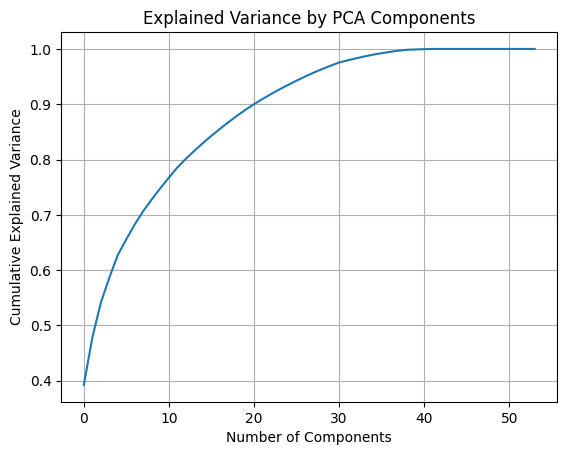

Number of PCA components to retain 95% variance: 36


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# Standardize the features
from sklearn.preprocessing import StandardScaler
# Separate features and target variable
X = health.drop(columns=["Health Opportunity Index"])
y = health["Health Opportunity Index"]

# Define the numeric pipeline with imputation and scaling
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler())
])

# Apply the pipeline to the data
X_prepared = num_pipeline.fit_transform(X)

# Perform PCA
pca = PCA().fit(X_prepared)

# Plot the cumulative explained variance ratio
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()

# Choose the number of components that capture 95% variance
n_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.99) + 1
print(f'Number of PCA components to retain 95% variance: {n_components}')

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge, Lasso
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score
# num_pipeline = Pipeline([
#         ('imputer', SimpleImputer(strategy="median")),
#         ('std_scaler', StandardScaler()),
#     ])

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
    ('pca', PCA(n_components=36))
])

num_attribs = list(X_train)
print(num_attribs)
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
    ])

X_train_prepared = full_pipeline.fit_transform(X_train)
X_test_prepared = full_pipeline.transform(X_test)

['% Households: Less than $30,000', '% Population Age 18 to 64 for Whom Poverty Status  Is Determined: Living in Poverty', '% Population Age 18 to 64 for Whom Poverty Status  Is Determined: At or Above Poverty Level', '% Households: Less than $10,000', '% Households: $100,000 or More', '% Households: $150,000 to $199,999', '% Families: Income At or Above Poverty Level', '% Families: Income Below Poverty Level', '% Population Under 18 Years of Age for Whom Poverty Status Is Determined: At or Above Poverty Level', '% Population Under 18 Years of Age for Whom Poverty Status Is Determined: Living in Poverty', 'Gini Index', '% Households: $10,000 to $14,999', '% Households: $125,000 to $149,999', '% Total: with Health Insurance Coverage: Private Health Insurance', 'Median Family Income (In 2017 Inflation Adjusted Dollars)', '% Households: $20,000 to $24,999', '% Households: $15,000 to $19,999', 'Renter-Occupied Housing Units', '% Renter-Occupied Housing Units: Less than $1,000', '% Househol

In [ ]:
print(health_data.shape)
print(X_train_prepared.shape)
print(X_test_prepared.shape)

(1874, 54)
(1499, 36)
(375, 36)


### Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor  # Import XGBoost Regressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

# Dictionary to hold the performance metrics of the models
model_performance = {}

# Linear Regression
lr = LinearRegression()
lr.fit(X_train_prepared, y_train)
y_pred_lr = lr.predict(X_test_prepared)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
model_performance['Linear Regression'] = (mse_lr, mae_lr, r2_lr)

# Decision Tree Regression
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train_prepared, y_train)
y_pred_dt = dt.predict(X_test_prepared)
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
model_performance['Decision Tree'] = (mse_dt, mae_dt, r2_dt)

# Random Forest Regression
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_prepared, y_train)
y_pred_rf = rf.predict(X_test_prepared)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
model_performance['Random Forest'] = (mse_rf, mae_rf, r2_rf)

# XGBoost Regression
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train_prepared, y_train)
y_pred_xgb = xgb.predict(X_test_prepared)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
model_performance['XGBoost'] = (mse_xgb, mae_xgb, r2_xgb)

rf_2 = RandomForestRegressor(n_estimators=20, max_features=60, bootstrap=True, random_state=20)
rf_2.fit(X_train_prepared, y_train)
y_pred_rf_2 = rf_2.predict(X_test_prepared)
mse_rf_2 = mean_squared_error(y_test, y_pred_rf_2)
mae_rf_2 = mean_absolute_error(y_test, y_pred_rf_2)
r2_rf_2 = r2_score(y_test, y_pred_rf)
model_performance['Random Forest 2'] = (mse_rf_2, mae_rf_2, r2_rf_2)


# Print model performance
for model, metrics in model_performance.items():
    print(f"{model}:")
    print(f"  MSE: {metrics[0]}")
    print(f"  MAE: {metrics[1]}")
    print(f"  R^2: {metrics[2]}")
    print("------")


Linear Regression:
  MSE: 0.0023582256655723453
  MAE: 0.03775071265909985
  R^2: 0.6826825298571306
------
Decision Tree:
  MSE: 0.005313734188224562
  MAE: 0.05816118412693334
  R^2: 0.28499603993163125
------
Random Forest:
  MSE: 0.0027986048734179683
  MAE: 0.041709998852810654
  R^2: 0.6234261074641623
------
XGBoost:
  MSE: 0.00294324342801107
  MAE: 0.04335769493287034
  R^2: 0.6039638732519563
------
Random Forest 2:
  MSE: 0.0027707424913769652
  MAE: 0.04088316928113333
  R^2: 0.6234261074641623
------


In [ ]:
lr.coef_

array([-1.31408258e-02,  6.32349414e-03, -2.09072988e-03, -1.78113365e-02,
        8.14861482e-03, -6.42413650e-03, -9.55434303e-03,  5.09501154e-03,
        1.19762942e-02, -6.67935294e-03, -3.08045719e-03,  1.70119131e-02,
       -4.60106629e-03,  6.95354479e-03,  7.03448568e-03, -2.32910013e-04,
        1.18019868e-02, -2.80869179e-03, -1.14929802e-04,  1.14674920e-03,
       -2.36657026e-03, -2.67507503e-03, -1.45463119e-03, -2.98073700e-03,
       -8.73292603e-05,  3.98680637e-03, -6.05209109e-03])

In [ ]:
X_new_prepared = full_pipeline.transform(health_data)

In [ ]:
# Step 2: Make Predictions
new_predictions = rf.predict(X_new_prepared)

# Step 3: Attach Predictions to VA HOI Dataset
health_data['Predicted_Health_Opportunity_Index'] = new_predictions

sorted_health = health_data.sort_values(by='Predicted_Health_Opportunity_Index')

sorted_health.to_csv("VA_rf_results.csv", index=False)
sorted_health

<ipython-input-26-56438216cf1f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  health_data['Predicted_Health_Opportunity_Index'] = new_predictions


,"% Households: Less than $30,000",% Population Age 18 to 64 for Whom Poverty Status Is Determined: Living in Poverty,% Population Age 18 to 64 for Whom Poverty Status Is Determined: At or Above Poverty Level,"% Households: Less than $10,000","% Households: $100,000 or More","% Households: $150,000 to $199,999",% Families: Income At or Above Poverty Level,% Families: Income Below Poverty Level,% Population Under 18 Years of Age for Whom Poverty Status Is Determined: At or Above Poverty Level,% Population Under 18 Years of Age for Whom Poverty Status Is Determined: Living in Poverty,...,"% Renter-Occupied Housing Units: $2,500 to $2,999",% Renter-Occupied Housing Units: $300 to $499,"% Households: $40,000 to $44,999",% Renter-Occupied Housing Units: Householder 35 to 44 Years,Population Density (Per Sq. Mile),% Renter-Occupied Housing Units: Householder 45 to 54 Years,"% Households: $75,000 to $99,999",% Renter-Occupied Housing Units: $800 to $999,Health Opportunity Index,Predicted_Health_Opportunity_Index
1,72.92,71.48,28.52,32.93,14.15,1.71,73.33,26.67,0.00,100.00,...,0.00,0.00,2.44,0.00,19028.78000,16.16,2.44,22.56,0.015558,0.074406
0,64.91,69.37,30.63,58.77,3.07,0.00,82.76,17.24,100.00,0.00,...,0.00,7.62,0.00,4.29,3673.54200,6.67,0.00,2.38,0.000000,0.086141
2,10.59,8.45,91.55,3.31,59.23,16.20,91.77,8.23,48.23,51.77,...,14.24,0.00,5.01,21.03,44220.11000,3.91,15.92,3.06,0.032861,0.119017
4,48.60,51.00,49.00,19.54,25.41,5.15,94.69,5.31,100.00,0.00,...,3.23,3.86,3.06,7.35,17905.62000,1.35,4.30,13.90,0.085121,0.131325
3,58.56,55.08,44.92,16.15,6.41,0.00,72.04,27.96,61.98,38.02,...,1.66,7.64,7.27,4.32,10131.44000,6.81,1.48,11.46,0.077873,0.132590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1865,1.81,1.56,98.44,1.27,90.99,23.88,99.68,0.32,99.68,0.32,...,69.37,0.00,0.60,26.13,4191.24000,50.45,4.59,0.00,0.619207,0.595996
1870,6.83,3.59,96.41,1.67,65.63,20.28,97.60,2.40,95.97,4.03,...,8.94,0.00,0.86,42.28,1807.66700,8.94,13.18,8.94,0.638278,0.596758
1873,76.47,47.83,52.17,0.00,0.00,0.00,50.00,50.00,NaN,NaN,...,NaN,NaN,0.00,NaN,35.91853,NaN,0.00,NaN,0.728815,0.600033
1867,13.06,8.77,91.23,2.25,53.37,15.45,97.67,2.33,92.72,7.28,...,9.23,0.00,3.09,26.92,7046.65900,23.85,13.62,3.08,0.625536,0.604776


In [ ]:
# tolerance = 0.05

# Calculate correct predictions again with numpy
# correct_predictions = np.abs(sorted_health['Predicted_Health_Opportunity_Index'] - sorted_health['Health Opportunity Index']) <= tolerance
correct_predictions = np.abs(sorted_health['Predicted_Health_Opportunity_Index'] - sorted_health['Health Opportunity Index'])

# Calculate custom accuracy
accuracy = np.mean(correct_predictions)
accuracy_percentage = accuracy * 100  # convert to percentage
print("accuracy of random forest:")
accuracy_percentage

accuracy of random forest:


1.9889368368074696

In [ ]:
# Step 2: Make Predictions
new_predictions = lr.predict(X_new_prepared)

# Step 3: Attach Predictions to VA HOI Dataset
health_data['Predicted_Health_Opportunity_Index'] = new_predictions

sorted_health1 = health_data.sort_values(by='Predicted_Health_Opportunity_Index')
sorted_health1

<ipython-input-85-38b811bb61a4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  health_data['Predicted_Health_Opportunity_Index'] = new_predictions


,"% Households: Less than $30,000",% Population Age 18 to 64 for Whom Poverty Status Is Determined: Living in Poverty,% Population Age 18 to 64 for Whom Poverty Status Is Determined: At or Above Poverty Level,"% Households: Less than $10,000","% Households: $100,000 or More","% Households: $150,000 to $199,999",% Families: Income At or Above Poverty Level,% Families: Income Below Poverty Level,% Population Under 18 Years of Age for Whom Poverty Status Is Determined: At or Above Poverty Level,% Population Under 18 Years of Age for Whom Poverty Status Is Determined: Living in Poverty,...,"% Renter-Occupied Housing Units: $2,500 to $2,999",% Renter-Occupied Housing Units: $300 to $499,"% Households: $40,000 to $44,999",% Renter-Occupied Housing Units: Householder 35 to 44 Years,Population Density (Per Sq. Mile),% Renter-Occupied Housing Units: Householder 45 to 54 Years,"% Households: $75,000 to $99,999",% Renter-Occupied Housing Units: $800 to $999,Health Opportunity Index,Predicted_Health_Opportunity_Index
0,64.91,69.37,30.63,58.77,3.07,0.00,82.76,17.24,100.00,0.00,...,0.00,7.62,0.00,4.29,3673.54200,6.67,0.00,2.38,0.000000,0.005671
1,72.92,71.48,28.52,32.93,14.15,1.71,73.33,26.67,0.00,100.00,...,0.00,0.00,2.44,0.00,19028.78000,16.16,2.44,22.56,0.015558,0.025840
15,45.00,86.00,14.00,35.00,12.50,0.00,100.00,0.00,NaN,NaN,...,0.00,0.00,0.00,0.00,14307.04000,0.00,0.00,0.00,0.171843,0.118331
7,60.21,66.87,33.13,26.94,6.73,1.45,68.04,31.96,49.09,50.91,...,2.11,0.00,4.04,2.61,14843.08000,5.84,7.15,24.35,0.101564,0.130502
23,62.62,68.76,31.24,35.71,13.01,5.96,77.55,22.45,58.00,42.00,...,1.04,1.86,5.55,3.42,5201.41500,0.87,6.09,15.84,0.194604,0.137445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1745,2.75,1.80,98.20,1.85,91.45,23.43,98.05,1.95,100.00,0.00,...,4.92,0.00,0.00,0.00,3054.20500,95.08,1.85,0.00,0.547523,0.573268
1858,1.58,1.20,98.80,0.70,82.85,15.21,98.95,1.05,97.98,2.02,...,8.02,0.00,0.22,45.68,1920.66300,40.74,5.33,0.00,0.611253,0.582147
1872,2.54,1.45,98.55,0.36,82.27,23.06,98.70,1.30,98.30,1.70,...,16.96,0.00,3.18,42.11,1256.83700,11.11,9.64,0.00,0.687327,0.588914
1795,1.02,2.01,97.99,0.43,80.98,25.71,99.19,0.81,98.77,1.23,...,34.57,0.00,0.81,7.00,563.31380,24.28,6.99,0.00,0.563701,0.595949


In [ ]:
# tolerance = 0.05


# correct_predictions = np.abs(sorted_health1['Predicted_Health_Opportunity_Index'] - sorted_health1['Health Opportunity Index']) <= tolerance
correct_predictions = np.abs(sorted_health1['Predicted_Health_Opportunity_Index'] - sorted_health1['Health Opportunity Index'])

# Calculate custom accuracy
accuracy = np.mean(correct_predictions)
accuracy_percentage = accuracy * 100  # convert to percentage
print("acurracy of linear regression: ")
accuracy_percentage

acurracy of linear regression: 


3.816795781239358

In [ ]:
# Retrieve the intercept (β0)
intercept = lr.intercept_

# Retrieve the coefficients (β1, β2, ..., βn)
coefficients = lr.coef_

# Get the feature names if they exist or create generic feature names
# Get the feature names from the 'health' DataFrame
feature_names = X_train.columns

# Construct the linear equation as a string
linear_equation = f"y = {intercept}"
for coef, feature in zip(coefficients, feature_names):
    linear_equation += f" + ({coef}) * {feature}"

# Print the equation
print(linear_equation)

y = 0.4221310609671434 + (49030836419.46606) * % Households: Less than $30,000 + (-0.0058383941650390625) * % Population Age 18 to 64 for Whom Poverty Status  Is Determined: Living in Poverty + (0.00531005859375) * % Population Age 18 to 64 for Whom Poverty Status  Is Determined: At or Above Poverty Level + (-19032916244.016457) * % Households: Less than $10,000 + (-86492802285.90195) * % Households: $100,000 or More + (25070019497.69883) * % Households: $150,000 to $199,999 + (-0.00384521484375) * % Families: Income At or Above Poverty Level + (0.008234024047851562) * % Families: Income Below Poverty Level + (2.47955322265625e-05) * % Population Under 18 Years of Age for Whom Poverty Status Is Determined: At or Above Poverty Level + (-0.0031566619873046875) * % Population Under 18 Years of Age for Whom Poverty Status Is Determined: Living in Poverty + (-0.010187387466430664) * Gini Index + (-12535119197.0541) * % Households: $10,000 to $14,999 + (16164602705.427935) * % Households: $1

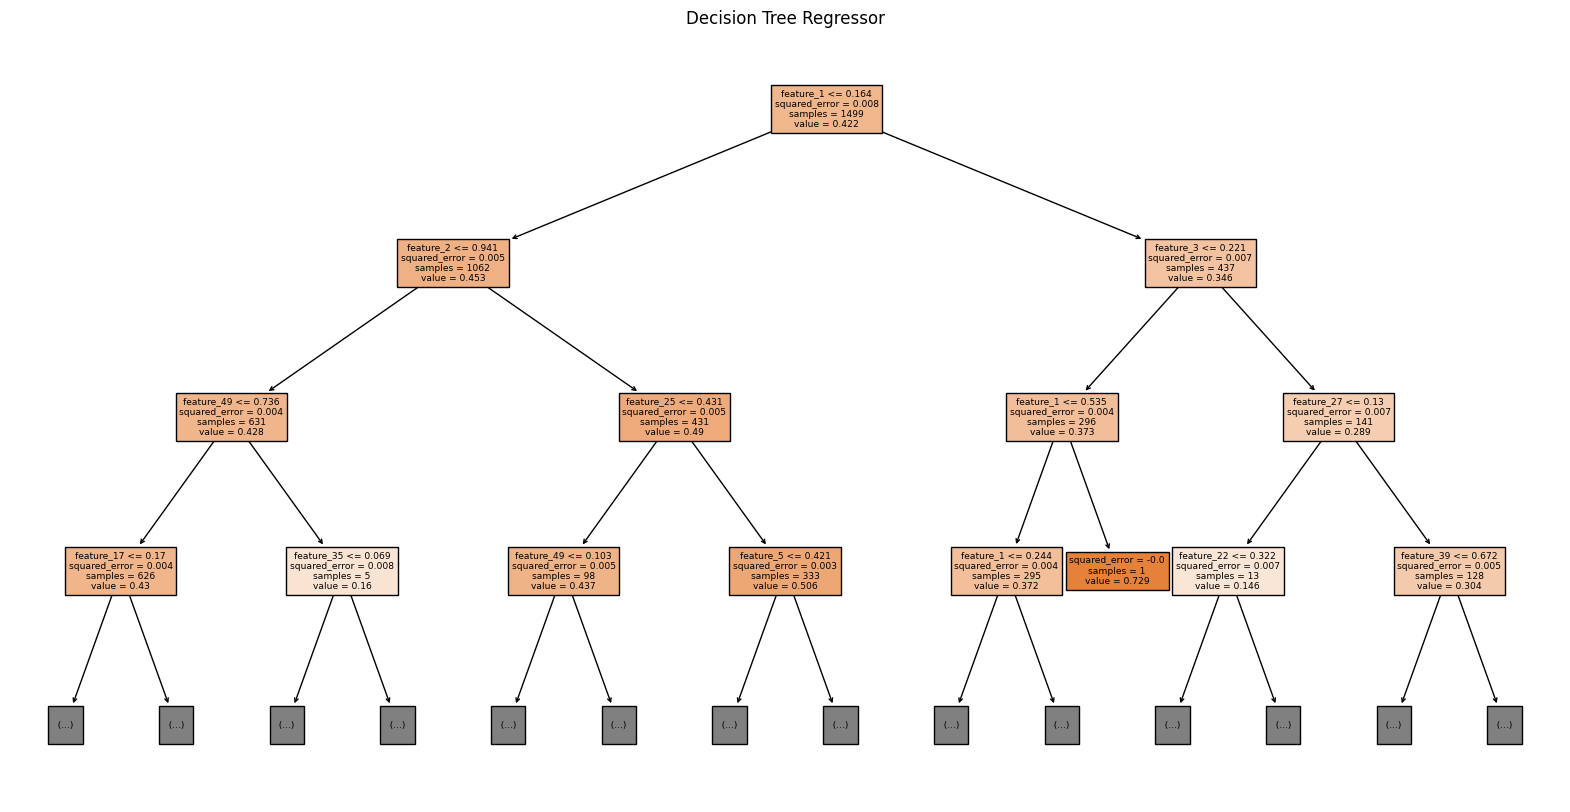

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming X_train_prepared is your prepared features DataFrame and has column names
feature_names = X_train_prepared.columns if 'columns' in dir(X_train_prepared) else [f'feature_{i}' for i in range(X_train_prepared.shape[1])]

plt.figure(figsize=(20, 10))
plot_tree(dt, filled=True, feature_names=feature_names, max_depth=3)
plt.title("Decision Tree Regressor")
plt.show()

In [ ]:
feature_names = X_train.columns

# Create a DataFrame to display feature index and names nicely
feature_index_name_df = pd.DataFrame(feature_names, columns=['Feature Name'])
feature_index_name_df.index.name = 'Feature Index'
feature_index_name_df.reset_index(inplace=True)
feature_index_name_df.to_csv("Appendix.csv",index=False)
# Print the DataFrame
print(feature_index_name_df)

    Feature Index                                       Feature Name
0               0                    % Households: Less than $30,000
1               1  % Population Age 18 to 64 for Whom Poverty Sta...
2               2  % Population Age 18 to 64 for Whom Poverty Sta...
3               3                    % Households: Less than $10,000
4               4                     % Households: $100,000 or More
5               5                 % Households: $150,000 to $199,999
6               6       % Families: Income At or Above Poverty Level
7               7             % Families: Income Below Poverty Level
8               8  % Population Under 18 Years of Age for Whom Po...
9               9  % Population Under 18 Years of Age for Whom Po...
10             10                                         Gini Index
11             11                   % Households: $10,000 to $14,999
12             12                 % Households: $125,000 to $149,999
13             13  % Total: with H

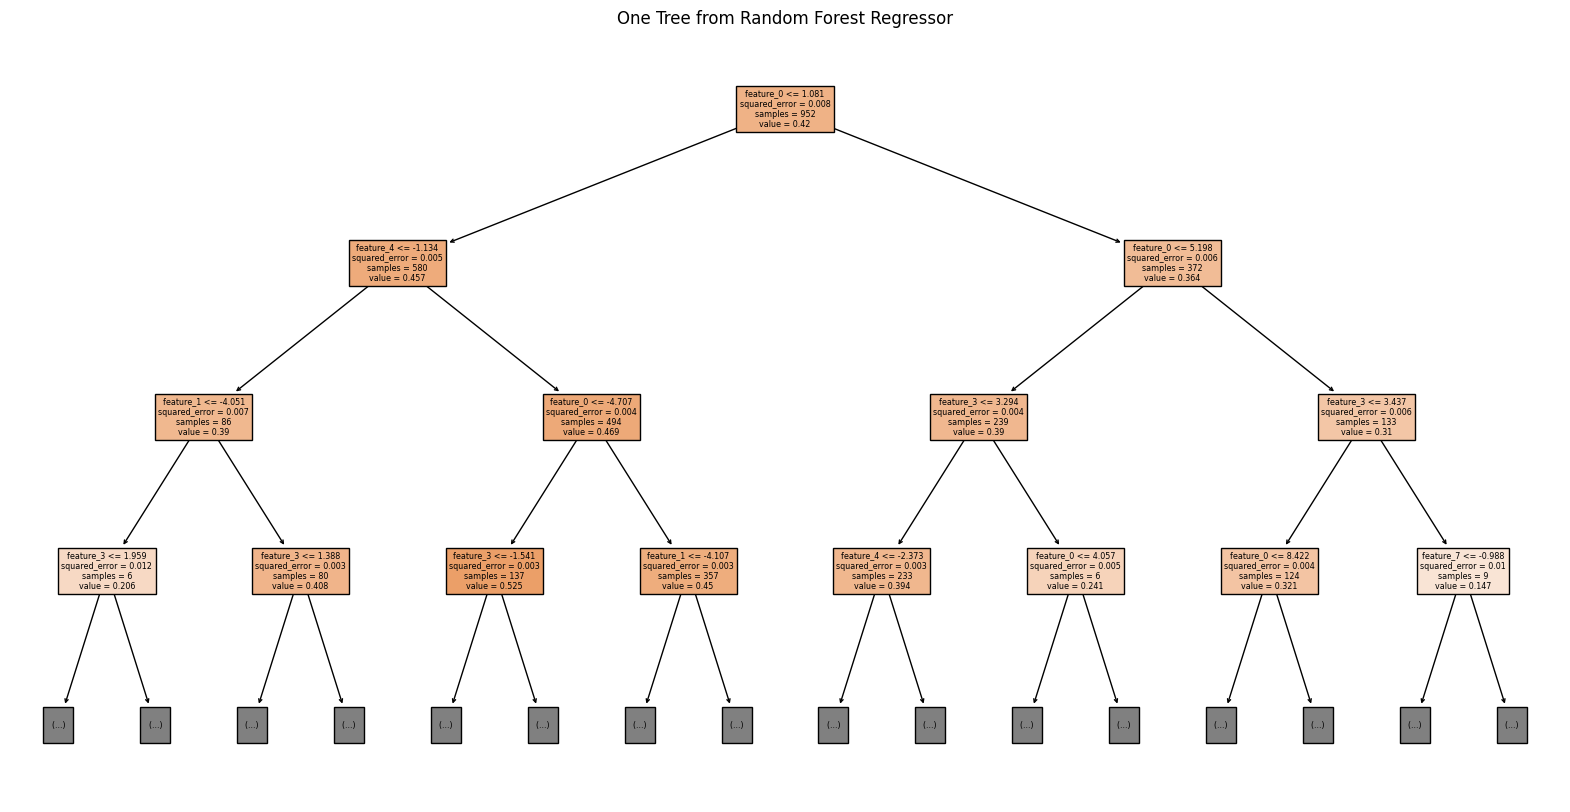

In [ ]:
# Visualize a single tree from the Random Forest
plt.figure(figsize=(20, 10))
# Assuming X_train_prepared is your prepared features DataFrame and has column names
feature_names = X_train_prepared.columns if 'columns' in dir(X_train_prepared) else [f'feature_{i}' for i in range(X_train_prepared.shape[1])]
plot_tree(rf.estimators_[0], filled=True, feature_names=feature_names, max_depth=3)
plt.title("One Tree from Random Forest Regressor")
plt.show()

<Figure size 1000x800 with 0 Axes>

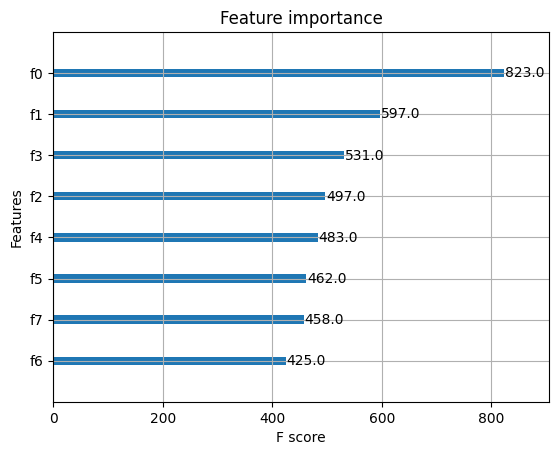

In [ ]:
from xgboost import plot_importance

plt.figure(figsize=(10, 8))
plot_importance(xgb, max_num_features=10)  # Show top 10 features
plt.show()


## Unused

In [ ]:
import tensorflow as tf
from tensorflow import keras


model = keras.models.Sequential([
      keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
      keras.layers.Dropout(0.2),
      keras.layers.Dense(64, activation='relu'),
      keras.layers.Dense(1)  # Output layer for regression
    ])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               6912      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 15,233
Trainable params: 15,233
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='nadam', loss='mean_squared_error', metrics=[tf.keras.metrics.RootMeanSquaredError()])

history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
38/38 [==============================] - 6s 28ms/step - loss: nan - root_mean_squared_error: nan - val_loss: nan - val_root_mean_squared_error: nan
Epoch 2/100
38/38 [==============================] - 0s 11ms/step - loss: nan - root_mean_squared_error: nan - val_loss: nan - val_root_mean_squared_error: nan
Epoch 3/100
38/38 [==============================] - 1s 16ms/step - loss: nan - root_mean_squared_error: nan - val_loss: nan - val_root_mean_squared_error: nan
Epoch 4/100
38/38 [==============================] - 0s 11ms/step - loss: nan - root_mean_squared_error: nan - val_loss: nan - val_root_mean_squared_error: nan
Epoch 5/100
38/38 [==============================] - 1s 23ms/step - loss: nan - root_mean_squared_error: nan - val_loss: nan - val_root_mean_squared_error: nan
Epoch 6/100
38/38 [==============================] - 1s 25ms/step - loss: nan - root_mean_squared_error: nan - val_loss: nan - val_root_mean_squared_error: nan
Epoch 7/100
38/38 [=====================

In [ ]:
test_loss = model.evaluate(X_test, y_test)
print('Test MSE:', test_loss)

12/12 [==============================] - 0s 2ms/step - loss: nan - root_mean_squared_error: nan
Test MSE: [nan, nan]


In [ ]:
from sklearn.model_selection import KFold

def build_model(input_shape):
    model = keras.models.Sequential([
        keras.layers.Dense(128, activation='relu', input_shape=(input_shape,)),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(1)  # Output layer for regression
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=[tf.keras.metrics.MeanSquaredError()])
    return model

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
fold_no = 1
mse_scores = []

for train_index, test_index in kfold.split(X):
    X_train_fold, X_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]

    model = build_model(X_train_fold.shape[1])
    model.fit(X_train_fold, y_train_fold, epochs=50, batch_size=32, verbose=0)  # Adjust epochs, batch_size as needed

    scores = model.evaluate(X_test_fold, y_test_fold, verbose=0)
    print(f"Fold {fold_no}, Mean Squared Error: {scores[1]}")
    mse_scores.append(scores[1])
    fold_no += 1

average_mse = sum(mse_scores) / len(mse_scores)
print(f"Average Mean Squared Error across all folds: {average_mse}")

NameError: name 'X' is not defined

## Apply Trained Model to Other States (California)

In [ ]:
import pandas as pd

# Load the datasets
hoi_cal = pd.read_csv('Cali_HOI.csv')


<ipython-input-31-8584d8c545e4>:4: DtypeWarning: Columns (0,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265

In [ ]:
# Find the number of entries in the dataset
print(f"The dataset have {hoi_cal.shape[0]} entries (rows)")

The dataset have 8058 entries (rows)


In [ ]:
# Find the number of features in the dataset
print(f"The dataset have {hoi_cal.shape[1]} features (columns)")

The dataset have 269 features (columns)


In [ ]:
import pandas as pd

# Load the datasets
hoi_cal = pd.read_csv('Cali_HOI.csv')
hoi_new = pd.read_csv('HOI_new.csv')

hoi_cal['Census Tract'] = hoi_cal['FIPS']

# Identify columns that are in hoi_new but not in hoi_cal
columns_in_new_not_in_cal = [col for col in hoi_new.columns if col not in hoi_cal.columns]

columns_in_new_not_in_cal

# Step 3: Drop any empty columns and perform additional necessary cleaning
hoi_cal_cleaned = hoi_cal.dropna(axis=1, how='all')

hoi_cal_cleaned = hoi_cal_cleaned.drop(labels = 0, axis = 0)
# Drop the specified "rubbish" columns from the final dataset
columns_to_drop = [
    "FIPS", "Area Name","State/U.S.-Abbreviation (USPS)", "State/U.S.-Abbreviation (USPS)", "File Identification", "Qualifying Name", "State Postal Abbreviation",
    "Summary Level", "Geographic Component", "File identification",
    "Logical Record Number", "State (FIPS Code)", "County of current residence",
    "Census Tract_y", "Geographic Identifier", "Total Population.1"
]
# Drop these columns, being careful to only drop those that exist in the dataframe to avoid KeyError
hoi_cal_final_cleaned = hoi_cal_cleaned.drop(columns=[col for col in columns_to_drop if col in hoi_cal_cleaned.columns])


# Combine several columns to simplify data
def sum_attr(row, col_names):
  sum = 0
  for col_name in col_names:
    sum += float(row[col_name])
  return sum


hoi_cal_final_cleaned['% Households: Less than $30,000'] = hoi_cal_final_cleaned.apply(lambda row: sum_attr(row,
    ["% Households: Less than $10,000", "% Households: $10,000 to $14,999",
     "% Households: $15,000 to $19,999", "% Households: $20,000 to $24,999",
     "% Households: $25,000 to $29,999"]
  ), axis=1)

hoi_cal_final_cleaned['% Households: $30,000 to $99,999'] = hoi_cal_final_cleaned.apply(lambda row: sum_attr(row,
    ["% Households: $30,000 to $34,999", "% Households: $35,000 to $39,999",
     "% Households: $40,000 to $44,999", "% Households: $45,000 to $49,999",
     "% Households: $50,000 to $59,999", "% Households: $60,000 to $74,999",
     "% Households: $75,000 to $99,999"]
  ), axis=1)


hoi_cal_final_cleaned['% Households: $100,000 or More'] = hoi_cal_final_cleaned.apply(lambda row: sum_attr(row,
    ["% Households: $100,000 to $124,999", "% Households: $125,000 to $149,999",
     "% Households: $150,000 to $199,999", "% Households: $200,000 or More"]
  ), axis=1)

hoi_cal_final_cleaned['% Renter-Occupied Housing Units: Less than $1,000'] = hoi_cal_final_cleaned.apply(lambda row: sum_attr(row,
    ["% Renter-Occupied Housing Units: Less than $300", "% Renter-Occupied Housing Units: $300 to $499",
     "% Renter-Occupied Housing Units: $500 to $799", "% Renter-Occupied Housing Units: $800 to $999"]
  ), axis=1)


hoi_cal_final_cleaned['% Renter-Occupied Housing Units: $1,000 to $2,499'] = hoi_cal_final_cleaned.apply(lambda row: sum_attr(row,
    ["% Renter-Occupied Housing Units: $1,000 to $1,499", "% Renter-Occupied Housing Units: $1,500 to $1,999",
     "% Renter-Occupied Housing Units: $2,000 to $2,499", "% Renter-Occupied Housing Units: $2,500 to $2,999"]
  ), axis=1)

columns_to_drop_after_aggregation = [
    "Households: Less than $10,000",
    "Households: $10,000 to $14,999",
    "Households: $15,000 to $19,999",
    "Households: $20,000 to $24,999",
    "Households: $25,000 to $29,999",
    "Households: $30,000 to $34,999",
    "Households: $35,000 to $39,999",
    "Households: $40,000 to $44,999",
    "Households: $45,000 to $49,999",
    "Households: $50,000 to $59,999",
    "Households: $60,000 to $74,999",
    "Households: $75,000 to $99,999",
    "Households: $100,000 to $124,999",
    "Households: $125,000 to $149,999",
    "Households: $150,000 to $199,999",
    "Households: $200,000 or More",
    "Renter-Occupied Housing Units: Less than $300",
    "Renter-Occupied Housing Units: $300 to $499",
    "Renter-Occupied Housing Units: $500 to $799",
    "Renter-Occupied Housing Units: $800 to $999",
    "Renter-Occupied Housing Units: $1,000 to $1,499",
    "Renter-Occupied Housing Units: $1,500 to $1,999",
    "Renter-Occupied Housing Units: $2,000 to $2,499",
    "Renter-Occupied Housing Units: $2,500 to $2,999",
]

hoi_cal_final_cleaned_merged = hoi_cal_final_cleaned.drop(columns=[col for col in columns_to_drop_after_aggregation if col in hoi_cal_final_cleaned.columns])


# Specify additional columns to drop based on the extended list provided
columns_to_drop_extended = [
    "Area (Land).1",
    "Renter-Occupied Housing Units: Householder 15 to 24 Years",
    "Renter-Occupied Housing Units: Householder 25 to 34 Years",
    "Renter-Occupied Housing Units: Householder 35 to 44 Years",
    "Renter-Occupied Housing Units: Householder 45 to 54 Years",
    "Renter-Occupied Housing Units: Householder 55 to 59 Years",
    "Renter-Occupied Housing Units: Householder 60 to 64 Years",
    "Renter-Occupied Housing Units: Householder 65 to 74 Years",
    "Renter-Occupied Housing Units: Householder 75 to 84 Years",
    "Renter-Occupied Housing Units: Householder 85 Years and Over",
    "Population 3 Years and Over: Enrolled in School",
    "Population 3 Years and Over: Not Enrolled in School",
    "Civilian Population 16 to 19 Years: Not High School Graduate, Not Enrolled (Dropped Out)",
    "Civilian Population 16 to 19 Years: High School Graduate, or Enrolled (In School)",
    "Civilian Population in Labor Force 16 Years and Over: Employed",
    "Civilian Population in Labor Force 16 Years and Over: Unemployed",
    "Households: Less than $10,000",
    "Households: $10,000 to $14,999",
    "Households: $15,000 to $19,999",
    "Households: $20,000 to $24,999",
    "Households: $25,000 to $29,999",
    "Households: $30,000 to $34,999",
    "Households: $35,000 to $39,999",
    "Households: $40,000 to $44,999",
    "Households: $45,000 to $49,999",
    "Households: $50,000 to $59,999",
    "Households: $60,000 to $74,999",
    "Households: $75,000 to $99,999",
    "Households: $100,000 to $124,999",
    "Households: $125,000 to $149,999",
    "Households: $150,000 to $199,999",
    "Households: $200,000 or More",
    "Renter-Occupied Housing Units.1",
    "Renter-Occupied Housing Units: Less than $300",
    "Renter-Occupied Housing Units: $300 to $499",
    "Renter-Occupied Housing Units: $500 to $799",
    "Renter-Occupied Housing Units: $800 to $999",
    "Renter-Occupied Housing Units: $1,000 to $1,499",
    "Renter-Occupied Housing Units: $1,500 to $1,999",
    "Renter-Occupied Housing Units: $2,000 to $2,499",
    "Renter-Occupied Housing Units: $2,500 to $2,999",
    "Renter-Occupied Housing Units: $3,000 or More",
    "Renter-Occupied Housing Units: No Cash Rent",
    "Renter-Occupied Housing Units.2",
    "Renter-Occupied Housing Units: Less than $20,000",
    "Renter-Occupied Housing Units: Less than $20,000: Less than 20 Percent",
    "Renter-Occupied Housing Units: Less than $20,000: 20 to 29 Percent",
    "Renter-Occupied Housing Units: Less than $20,000: 30 Percent or More",
    "Renter-Occupied Housing Units: $20,000 to $34,999",
    "Renter-Occupied Housing Units: $20,000 to $34,999: Less than 20 Percent",
    "Renter-Occupied Housing Units: $20,000 to $34,999: 20 to 29 Percent",
    "Renter-Occupied Housing Units: $20,000 to $34,999: 30 Percent or More",
    "Renter-Occupied Housing Units: $35,000 to $49,999",
    "Renter-Occupied Housing Units: $35,000 to $49,999: Less than 20 Percent",
    "Renter-Occupied Housing Units: $35,000 to $49,999: 20 to 29 Percent",
    "Renter-Occupied Housing Units: $35,000 to $49,999: 30 Percent or More",
    "Renter-Occupied Housing Units: $50,000 to $74,999",
    "Renter-Occupied Housing Units: $50,000 to $74,999: Less than 20 Percent",
    "Renter-Occupied Housing Units: $50,000 to $74,999: 20 to 29 Percent",
    "Renter-Occupied Housing Units: $50,000 to $74,999: 30 Percent or More",
    "Renter-Occupied Housing Units: $75,000 or More",
    "Renter-Occupied Housing Units: $75,000 or More: Less than 20 Percent",
    "Renter-Occupied Housing Units: $75,000 or More: 20 to 29 Percent",
    "Renter-Occupied Housing Units: $75,000 or More: 30 Percent or More",
    "Renter-Occupied Housing Units: Zero or Negative Income",
    "Renter-Occupied Housing Units: No Cash Rent.1",
    "% Renter-Occupied Housing Units: Less than $20,000",
    "% Renter-Occupied Housing Units: Less than $20,000: Less than 20 Percent",
    "% Renter-Occupied Housing Units: Less than $20,000: 20 to 29 Percent",
    "% Renter-Occupied Housing Units: Less than $20,000: 30 Percent or More",
    "% Renter-Occupied Housing Units: $20,000 to $34,999",
    "% Renter-Occupied Housing Units: $20,000 to $34,999: Less than 20 Percent",
    "% Renter-Occupied Housing Units: $20,000 to $34,999: 20 to 29 Percent",
    "% Renter-Occupied Housing Units: $20,000 to $34,999: 30 Percent or More",
    "% Renter-Occupied Housing Units: $35,000 to $49,999",
    "% Renter-Occupied Housing Units: $35,000 to $49,999: Less than 20 Percent",
    "% Renter-Occupied Housing Units: $35,000 to $49,999: 20 to 29 Percent",
    "% Renter-Occupied Housing Units: $35,000 to $49,999: 30 Percent or More",
    "% Renter-Occupied Housing Units: $50,000 to $74,999",
    "% Renter-Occupied Housing Units: $50,000 to $74,999: Less than 20 Percent",
    "% Renter-Occupied Housing Units: $50,000 to $74,999: 20 to 29 Percent",
    "% Renter-Occupied Housing Units: $50,000 to $74,999: 30 Percent or More",
    "% Renter-Occupied Housing Units: $75,000 or More",
    "% Renter-Occupied Housing Units: $75,000 or More: Less than 20 Percent",
    "% Renter-Occupied Housing Units: $75,000 or More: 20 to 29 Percent",
    "% Renter-Occupied Housing Units: $75,000 or More: 30 Percent or More",
    "% Renter-Occupied Housing Units: Zero or Negative Income",
    "% Renter-Occupied Housing Units: No Cash Rent.1",
    "Families: Income Below Poverty Level",
    "Families: Income Below Poverty Level: Married Couple Family: with Related Child Living Below Poverty Level",
    "Families: Income Below Poverty Level: Married Couple Family: No Related Children Under 18 Years",
    "Families: Income Below Poverty Level: Male Householder, No Wife Present",
    "Families: Income Below Poverty Level: Male Householder, No Wife Present: with Related Children Under 18 Years",
    "Families: Income Below Poverty Level: Male Householder, No Wife Present: No Related Children Under 18 Years",
    "Families: Income Below Poverty Level: Female Householder, No Husband Present",
    "Families: Income Below Poverty Level: Female Householder, No Husband Present: with Related Children Under 18 Years",
    "Families: Income Below Poverty Level: Female Householder, No Husband Present: No Related Children Under 18 Years",
    "Families: Income At or Above Poverty Level",
    "% Families: Income Below Poverty Level: Married Couple Family: with Related Child Living Below Poverty Level",
    "% Families: Income Below Poverty Level: Married Couple Family: No Related Children Under 18 Years",
    "% Families: Income Below Poverty Level: Male Householder, No Wife Present",
    "% Families: Income Below Poverty Level: Male Householder, No Wife Present: with Related Children Under 18 Years",
    "% Families: Income Below Poverty Level: Male Householder, No Wife Present: No Related Children Under 18 Years",
    "% Families: Income Below Poverty Level: Female Householder, No Husband Present",
    "% Families: Income Below Poverty Level: Female Householder, No Husband Present: with Related Children Under 18 Years",
    "% Families: Income Below Poverty Level: Female Householder, No Husband Present: No Related Children Under 18 Years",
    "Population Under 18 Years of Age for Whom Poverty Status Is Determined:",
    "Population Under 18 Years of Age for Whom Poverty Status Is Determined: Living in Poverty",
    "Population Under 18 Years of Age for Whom Poverty Status Is Determined: At or Above Poverty Level",
    "Population Age 18 to 64 for Whom Poverty Status  Is Determined:",
    "Population Age 18 to 64 for Whom Poverty Status  Is Determined: Living in Poverty",
    "Population Age 18 to 64 for Whom Poverty Status  Is Determined: At or Above Poverty Level",
    "Population Age 65 and Over for Whom Poverty  Status Is Determined:",
    "Population Age 65 and Over for Whom Poverty  Status Is Determined: Living in Poverty",
    "Population Age 65 and Over for Whom Poverty  Status Is Determined: At or Above Poverty Level",
    "Population for Whom Poverty Status Is Determined:",
    "Population for Whom Poverty Status Is Determined: Under .50",
    "Population for Whom Poverty Status Is Determined: .50 to .74",
    "Population for Whom Poverty Status Is Determined: .75 to .99",
    "Population for Whom Poverty Status Is Determined: 1.00 to 1.49",
    "Population for Whom Poverty Status Is Determined: 1.50 to 1.99",
    "Population for Whom Poverty Status Is Determined: 2.00 and Over",
    "% Population for Whom Poverty Status Is Determined: Under .50",
    "% Population for Whom Poverty Status Is Determined: .50 to .74",
    "% Population for Whom Poverty Status Is Determined: .75 to .99",
    "% Population for Whom Poverty Status Is Determined: 1.00 to 1.49",
    "% Population for Whom Poverty Status Is Determined: 1.50 to 1.99",
    "% Population for Whom Poverty Status Is Determined: 2.00 and Over",
    "Total: No Health Insurance Coverage",
    "Total: with Health Insurance Coverage",
    "Total: with Health Insurance Coverage: Public Health Coverage",
    "Total: with Health Insurance Coverage: Private Health Insurance",
    "Population 16 Years and Over: in Labor Force",
    "Population 16 Years and Over: in Labor Force: in Armed Forces",
    "Population 16 Years and Over: in Labor Force: Civilian",
    "Population 16 Years and Over: in Labor Force: Civilian: Employed",
    "Population 16 Years and Over: in Labor Force: Civilian: Unemployed",
    "Population 16 Years and Over: Not in Labor Force",

]

hoi_cal_final_cleaned_extended = hoi_cal_final_cleaned_merged.drop(columns=[col for col in columns_to_drop_extended if col in hoi_cal_final_cleaned_merged.columns])

# Show the final row count and a preview of the cleaned dataset
hoi_cal_final_cleaned_extended.to_csv("Cleaned_cal.csv", index=False)
hoi_cal_final_cleaned_extended

<ipython-input-34-5166480ac18d>:4: DtypeWarning: Columns (0,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265

,Name of Area,US,Region,Division,State (Census Code),State (FIPS),County,County Subdivision (FIPS),Place (FIPS Code),Place (State FIPS + Place FIPS),...,Total:,% Total: No Health Insurance Coverage,% Total: with Health Insurance Coverage,% Total: with Health Insurance Coverage: Public Health Coverage,% Total: with Health Insurance Coverage: Private Health Insurance,"% Households: Less than $30,000","% Households: $30,000 to $99,999","% Households: $100,000 or More","% Renter-Occupied Housing Units: Less than $1,000","% Renter-Occupied Housing Units: $1,000 to $2,499"
1,"Census Tract 4001, Alameda County, California",NaN,NaN,NaN,NaN,06,001,NaN,NaN,NaN,...,2991,1.57,98.43,26.78,89.9,9.73,17.79,72.49,6.00,15.99
2,"Census Tract 4002, Alameda County, California",NaN,NaN,NaN,NaN,06,001,NaN,NaN,NaN,...,1997,3.3,96.7,22.23,89.53,3.14,27.53,69.33,2.70,86.19
3,"Census Tract 4003, Alameda County, California",NaN,NaN,NaN,NaN,06,001,NaN,NaN,NaN,...,5123,3.03,96.97,16.05,89.19,20.05,37.10,42.84,24.19,65.55
4,"Census Tract 4004, Alameda County, California",NaN,NaN,NaN,NaN,06,001,NaN,NaN,NaN,...,3986,3.36,96.64,20.62,86.38,15.79,32.14,52.07,11.23,83.65
5,"Census Tract 4005, Alameda County, California",NaN,NaN,NaN,NaN,06,001,NaN,NaN,NaN,...,3944,6.29,93.71,16.76,83.49,15.50,36.48,48.00,12.47,80.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8053,"Census Tract 408, Yuba County, California",NaN,NaN,NaN,NaN,6,115,NaN,NaN,NaN,...,4497,9.61,90.39,29.46,72.83,14.97,51.82,33.20,51.62,48.37
8054,"Census Tract 409.01, Yuba County, California",NaN,NaN,NaN,NaN,6,115,NaN,NaN,NaN,...,3080,11.62,88.38,52.4,48.77,39.03,35.04,25.95,26.17,63.09
8055,"Census Tract 409.02, Yuba County, California",NaN,NaN,NaN,NaN,6,115,NaN,NaN,NaN,...,777,2.06,97.94,12.87,88.67,24.23,65.07,10.71,1.41,94.65
8056,"Census Tract 410, Yuba County, California",NaN,NaN,NaN,NaN,6,115,NaN,NaN,NaN,...,7336,4.93,95.07,43.73,70.67,16.65,52.81,30.55,36.06,58.20


In [ ]:
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
np.random.seed(42)

def load_health_data():
    health = pd.read_csv('Cleaned_cal.csv')
    return health

health_cal = load_health_data()
# Display the first n rows of the data. (n=5 by default, we will use 10 rows)
health_cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8057 entries, 0 to 8056
Columns: 129 entries, Name of Area to % Renter-Occupied Housing Units: $1,000 to $2,499
dtypes: float64(113), int64(15), object(1)
memory usage: 7.9+ MB


In [ ]:
# List of columns from the Virginia training dataset, excluding the target variable
training_columns = list(health_data.columns)
training_columns.remove('Health Opportunity Index')
training_columns.remove('Predicted_Health_Opportunity_Index')

# Align health_cal with these columns, ensuring it only includes them
# Drop columns in health_cal not present in training_columns
health_cal_aligned = health_cal[[col for col in health_cal.columns if col in training_columns]]

# # Check for any missing columns in health_cal_aligned and add them with default values (e.g., 0)
# for col in training_columns:
#     if col not in health_cal_aligned.columns:
#         health_cal_aligned[col] = 0  # You might choose a different default value based on your data's nature

# Ensure the order of columns in health_cal_aligned matches training_columns order
health_cal_aligned = health_cal_aligned[training_columns]

health_cal_aligned

# Before proceeding to prediction, remember to apply the same preprocessing steps (e.g., scaling) to health_cal_aligned
# as were applied to your training data.

# Example for scaling (assuming you've fitted a scaler on your training data):
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler().fit(va_final[training_columns])  # Assuming va_final is your training data
# health_cal_aligned_scaled = scaler.transform(health_cal_aligned)

# Now, health_cal_aligned is ready for prediction with your trained model


,"% Households: Less than $30,000",% Population Age 18 to 64 for Whom Poverty Status Is Determined: Living in Poverty,% Population Age 18 to 64 for Whom Poverty Status Is Determined: At or Above Poverty Level,"% Households: Less than $10,000","% Households: $100,000 or More","% Households: $150,000 to $199,999",% Families: Income At or Above Poverty Level,% Families: Income Below Poverty Level,% Population Under 18 Years of Age for Whom Poverty Status Is Determined: At or Above Poverty Level,% Population Under 18 Years of Age for Whom Poverty Status Is Determined: Living in Poverty,...,% Population 16 Years and Over: in Labor Force: Civilian: Unemployed,"% Renter-Occupied Housing Units: $1,000 to $2,499","% Renter-Occupied Housing Units: $2,500 to $2,999",% Renter-Occupied Housing Units: $300 to $499,"% Households: $40,000 to $44,999",% Renter-Occupied Housing Units: Householder 35 to 44 Years,Population Density (Per Sq. Mile),% Renter-Occupied Housing Units: Householder 45 to 54 Years,"% Households: $75,000 to $99,999",% Renter-Occupied Housing Units: $800 to $999
0,9.73,3.88,96.12,1.91,72.49,9.41,97.30,2.70,91.60,8.40,...,2.48,15.99,5.33,0.00,0.00,28.67,1123.62500,6.00,7.50,6.00
1,3.14,5.79,94.21,1.09,69.33,12.20,98.76,1.24,98.06,1.94,...,2.85,86.19,17.42,0.00,3.02,25.23,8804.50400,12.91,8.21,2.70
2,20.05,8.69,91.31,3.25,42.84,12.53,98.39,1.61,100.00,0.00,...,4.35,65.55,4.33,0.00,5.41,18.34,12004.13000,15.74,13.51,11.34
3,15.79,8.75,91.25,3.36,52.07,15.79,95.28,4.72,90.46,9.54,...,3.89,83.65,10.88,0.80,1.12,23.08,14462.34000,13.26,13.16,6.37
4,15.50,12.04,87.96,2.77,48.00,12.06,99.34,0.66,100.00,0.00,...,2.06,80.64,4.22,1.92,4.55,18.31,17304.41000,13.71,13.48,6.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8052,14.97,9.44,90.56,1.33,33.20,10.71,94.41,5.59,90.36,9.64,...,6.31,48.37,0.00,11.66,3.06,22.81,106.72320,22.81,9.71,11.49
8053,39.03,24.31,75.69,4.55,25.95,3.41,77.06,22.94,57.86,42.14,...,7.53,63.09,0.00,0.00,1.80,18.73,30.25635,14.88,12.22,8.26
8054,24.23,7.99,92.01,7.89,10.71,0.00,89.30,10.70,86.55,13.45,...,2.96,94.65,3.10,0.00,7.04,16.90,42.32862,15.49,19.15,0.00
8055,16.65,7.72,92.28,3.19,30.55,11.53,93.60,6.40,81.42,18.58,...,2.86,58.20,18.65,3.89,4.26,14.14,40.72453,3.28,20.12,3.28


In [ ]:
# Find the number of entries in the dataset
print(f"The dataset have {health_cal_aligned.shape[0]} entries (rows)")

The dataset have 8057 entries (rows)


In [ ]:
# Find the number of features in the dataset
print(f"The dataset have {health_cal_aligned.shape[1]} features (columns)")

The dataset have 53 features (columns)


In [ ]:
X_new_prepared = full_pipeline.transform(health_cal_aligned)

In [ ]:
# Step 2: Make Predictions
new_predictions = lr.predict(X_new_prepared)

# Step 3: Attach Predictions to New Dataset (Optional)
health_cal_aligned['Predicted_Health_Opportunity_Index'] = new_predictions

sorted_health_cal = health_cal_aligned.sort_values(by='Predicted_Health_Opportunity_Index')

sorted_health_cal.to_csv("Cali_lr_result.csv", index = False)

sorted_health_cal

,"% Households: Less than $30,000",% Population Age 18 to 64 for Whom Poverty Status Is Determined: Living in Poverty,% Population Age 18 to 64 for Whom Poverty Status Is Determined: At or Above Poverty Level,"% Households: Less than $10,000","% Households: $100,000 or More","% Households: $150,000 to $199,999",% Families: Income At or Above Poverty Level,% Families: Income Below Poverty Level,% Population Under 18 Years of Age for Whom Poverty Status Is Determined: At or Above Poverty Level,% Population Under 18 Years of Age for Whom Poverty Status Is Determined: Living in Poverty,...,"% Renter-Occupied Housing Units: $1,000 to $2,499","% Renter-Occupied Housing Units: $2,500 to $2,999",% Renter-Occupied Housing Units: $300 to $499,"% Households: $40,000 to $44,999",% Renter-Occupied Housing Units: Householder 35 to 44 Years,Population Density (Per Sq. Mile),% Renter-Occupied Housing Units: Householder 45 to 54 Years,"% Households: $75,000 to $99,999",% Renter-Occupied Housing Units: $800 to $999,Predicted_Health_Opportunity_Index
6312,71.37,40.88,59.12,23.51,4.23,0.00,87.80,12.20,100.00,0.00,...,13.27,0.00,22.29,1.38,15.50,156683.300000,9.11,3.25,10.00,-0.204833
6309,54.07,29.76,70.24,16.88,6.20,1.21,86.72,13.28,82.57,17.43,...,39.67,0.66,11.19,1.83,17.50,140408.800000,18.35,8.07,18.31,-0.100310
6305,29.07,14.49,85.51,12.55,22.45,6.00,100.00,0.00,100.00,0.00,...,69.51,4.94,1.68,5.30,21.86,132527.000000,16.71,10.74,9.80,-0.006689
2019,70.49,78.18,21.82,36.79,7.56,1.94,74.34,25.66,79.31,20.69,...,86.23,15.26,0.00,2.23,3.68,84559.040000,3.46,2.16,1.05,0.062968
6306,44.27,32.35,67.65,16.14,20.77,6.03,94.01,5.99,100.00,0.00,...,48.41,3.92,8.99,6.58,16.27,96068.090000,20.44,9.26,15.06,0.126913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5373,3.87,3.63,96.37,0.72,65.57,18.52,97.76,2.24,93.99,6.01,...,92.24,46.27,0.00,0.94,17.31,3712.603000,48.66,12.51,3.28,0.813858
2692,0.00,0.00,100.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,...,100.00,0.00,0.00,0.00,0.00,2.849322,100.00,0.00,0.00,0.822543
342,5.57,1.61,98.39,2.51,66.65,22.10,99.44,0.56,97.85,2.15,...,90.68,17.80,0.00,1.32,15.25,264.826000,61.02,14.43,0.00,0.826601
357,0.00,0.00,100.00,0.00,72.00,12.00,100.00,0.00,NaN,NaN,...,84.00,40.00,0.00,0.00,40.00,40.150690,32.00,16.00,0.00,0.841068


In [ ]:
# Step 2: Make Predictions
new_predictions = rf.predict(X_new_prepared)

# Step 3: Attach Predictions to New Dataset (Optional)
health_cal_aligned['Predicted_Health_Opportunity_Index'] = new_predictions

sorted_health_cal = health_cal_aligned.sort_values(by='Predicted_Health_Opportunity_Index')

sorted_health_cal.to_csv("Cali_rf_result.csv", index = False)

sorted_health_cal

,"% Households: Less than $30,000",% Population Age 18 to 64 for Whom Poverty Status Is Determined: Living in Poverty,% Population Age 18 to 64 for Whom Poverty Status Is Determined: At or Above Poverty Level,"% Households: Less than $10,000","% Households: $100,000 or More","% Households: $150,000 to $199,999",% Families: Income At or Above Poverty Level,% Families: Income Below Poverty Level,% Population Under 18 Years of Age for Whom Poverty Status Is Determined: At or Above Poverty Level,% Population Under 18 Years of Age for Whom Poverty Status Is Determined: Living in Poverty,...,"% Renter-Occupied Housing Units: $1,000 to $2,499","% Renter-Occupied Housing Units: $2,500 to $2,999",% Renter-Occupied Housing Units: $300 to $499,"% Households: $40,000 to $44,999",% Renter-Occupied Housing Units: Householder 35 to 44 Years,Population Density (Per Sq. Mile),% Renter-Occupied Housing Units: Householder 45 to 54 Years,"% Households: $75,000 to $99,999",% Renter-Occupied Housing Units: $800 to $999,Predicted_Health_Opportunity_Index
1966,47.75,30.04,69.96,17.12,8.19,3.35,61.26,38.74,48.85,51.15,...,57.61,0.00,0.57,5.71,18.25,23778.850000,22.81,10.79,29.28,0.296013
992,45.61,31.98,68.02,14.17,2.44,0.00,66.84,33.16,58.01,41.99,...,32.61,0.00,5.26,9.52,23.05,5114.284000,22.51,8.86,26.68,0.296459
1945,54.06,37.02,62.98,20.26,5.33,2.85,58.70,41.30,49.09,50.91,...,54.25,0.00,5.02,3.78,21.65,22539.820000,28.24,8.38,17.97,0.297338
2863,45.81,38.17,61.83,15.91,4.57,0.00,59.27,40.73,53.89,46.11,...,41.60,0.00,10.45,3.24,27.05,14611.970000,30.68,16.05,12.05,0.297338
5732,54.53,28.67,71.33,10.82,6.04,0.00,64.96,35.04,37.41,62.59,...,66.56,1.21,0.00,7.38,33.99,19607.960000,17.60,7.97,22.66,0.297797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3601,15.32,14.22,85.78,6.22,37.32,8.37,100.00,0.00,100.00,0.00,...,32.61,0.00,20.50,4.55,47.20,4.576529,10.56,12.20,6.52,0.476877
2692,0.00,0.00,100.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,...,100.00,0.00,0.00,0.00,0.00,2.849322,100.00,0.00,0.00,0.477143
5817,32.18,45.82,54.18,15.65,27.82,7.70,94.96,5.04,95.35,4.65,...,95.31,0.78,0.00,4.22,15.47,464.560600,3.59,17.02,3.28,0.477371
5700,46.81,61.20,38.80,23.52,31.44,4.54,98.14,1.86,100.00,0.00,...,75.96,0.00,3.46,1.28,7.69,2738.859000,0.00,6.05,5.19,0.477736


In [ ]:
# Step 2: Make Predictions
new_predictions = xgb.predict(X_new_prepared)

# Step 3: Attach Predictions to New Dataset (Optional)
health_cal_aligned['Predicted_Health_Opportunity_Index'] = new_predictions

sorted_health_cal = health_cal_aligned.sort_values(by='Predicted_Health_Opportunity_Index')


sorted_health_cal.to_csv("Cali_xgb_result.csv", index = False)

sorted_health_cal

,"% Households: Less than $30,000",% Population Age 18 to 64 for Whom Poverty Status Is Determined: Living in Poverty,% Population Age 18 to 64 for Whom Poverty Status Is Determined: At or Above Poverty Level,"% Households: Less than $10,000","% Households: $100,000 or More","% Households: $150,000 to $199,999",% Families: Income At or Above Poverty Level,% Families: Income Below Poverty Level,% Population Under 18 Years of Age for Whom Poverty Status Is Determined: At or Above Poverty Level,% Population Under 18 Years of Age for Whom Poverty Status Is Determined: Living in Poverty,...,"% Renter-Occupied Housing Units: $1,000 to $2,499","% Renter-Occupied Housing Units: $2,500 to $2,999",% Renter-Occupied Housing Units: $300 to $499,"% Households: $40,000 to $44,999",% Renter-Occupied Housing Units: Householder 35 to 44 Years,Population Density (Per Sq. Mile),% Renter-Occupied Housing Units: Householder 45 to 54 Years,"% Households: $75,000 to $99,999",% Renter-Occupied Housing Units: $800 to $999,Predicted_Health_Opportunity_Index
4817,48.15,37.65,62.35,14.65,4.25,1.19,69.16,30.84,51.08,48.92,...,27.31,0.00,5.03,8.95,21.16,1767.129000,23.63,4.93,43.00,0.298631
7876,57.41,43.42,56.58,0.00,0.00,0.00,50.62,49.38,19.02,80.98,...,63.20,0.00,0.00,0.00,62.50,2424.271000,0.00,0.00,0.00,0.308146
1140,40.55,28.86,71.14,11.06,6.02,0.00,69.97,30.03,46.72,53.28,...,14.33,0.00,31.58,7.00,20.18,3283.567000,28.07,6.51,25.44,0.309014
2743,52.58,26.53,73.47,8.49,8.58,2.12,68.17,31.83,47.82,52.18,...,38.46,0.00,8.81,2.58,21.63,18383.630000,26.20,5.54,29.21,0.312637
7398,44.22,29.65,70.35,7.71,10.43,3.40,80.34,19.66,55.44,44.56,...,0.00,0.00,29.41,4.08,32.77,3.618255,15.13,6.58,6.72,0.313295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5817,32.18,45.82,54.18,15.65,27.82,7.70,94.96,5.04,95.35,4.65,...,95.31,0.78,0.00,4.22,15.47,464.560600,3.59,17.02,3.28,0.513474
6477,0.00,0.00,100.00,0.00,69.71,25.76,NaN,NaN,NaN,NaN,...,69.70,0.00,0.00,0.00,30.30,50.106300,30.30,30.30,22.73,0.514471
1873,51.72,35.06,64.94,18.23,17.66,2.77,76.97,23.03,69.26,30.74,...,35.70,6.36,17.91,2.77,20.06,1822.227000,21.90,7.35,6.26,0.515946
3422,0.00,0.00,100.00,0.00,90.69,30.23,100.00,0.00,NaN,NaN,...,NaN,NaN,NaN,0.00,NaN,1.209664,NaN,0.00,NaN,0.517565


## County Life expectancy Generation for CA

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('CA_county_ct.csv')

# Create a mapping from FIPS code to county name (only partial FIPS shown for brevity)
fips_to_county = {
    6001: 'Alameda County',
    6003: 'Alpine County',
    6005: 'Amador County',
    6007: 'Butte County',
    6009: 'Calaveras County',
    6011: 'Colusa County',
    6013: 'Contra Costa County',
    6015: 'Del Norte County',
    6017: 'El Dorado County',
    6019: 'Fresno County',
    6021: 'Glenn County',
    6023: 'Humboldt County',
    6025: 'Imperial County',
    6027: 'Inyo County',
    6029: 'Kern County',
    6031: 'Kings County',
    6033: 'Lake County',
    6035: 'Lassen County',
    6037: 'Los Angeles County',
    6039: 'Madera County',
    6041: 'Marin County',
    6043: 'Mariposa County',
    6045: 'Mendocino County',
    6047: 'Merced County',
    6049: 'Modoc County',
    6051: 'Mono County',
    6053: 'Monterey County',
    6055: 'Napa County',
    6057: 'Nevada County',
    6059: 'Orange County',
    6061: 'Placer County',
    6063: 'Plumas County',
    6065: 'Riverside County',
    6067: 'Sacramento County',
    6069: 'San Benito County',
    6071: 'San Bernardino County',
    6073: 'San Diego County',
    6075: 'San Francisco County',
    6077: 'San Joaquin County',
    6079: 'San Luis Obispo County',
    6081: 'San Mateo County',
    6083: 'Santa Barbara County',
    6085: 'Santa Clara County',
    6087: 'Santa Cruz County',
    6089: 'Shasta County',
    6091: 'Sierra County',
    6093: 'Siskiyou County',
    6095: 'Solano County',
    6097: 'Sonoma County',
    6099: 'Stanislaus County',
    6101: 'Sutter County',
    6103: 'Tehama County',
    6105: 'Trinity County',
    6107: 'Tulare County',
    6109: 'Tuolumne County',
    6111: 'Ventura County',
    6113: 'Yolo County',
    6115: 'Yuba County'
}



# Function to extract the county FIPS from the Census Tract and map to the county name
def map_county(tract):
    # Extract the first 5 digits to match FIPS codes
    county_fips = int(str(tract)[:4])
    return fips_to_county.get(county_fips, "Unknown")  # Returns "Unknown" if no match found

# Apply the mapping to fill in missing county names
data['County name'] = data['Census Tract'].apply(map_county)

# Save the updated data back to CSV
data.to_csv('CA_county_ct.csv', index=False)

# Load the updated dataset
data = pd.read_csv('CA_county_ct.csv')

# Calculate the frequency of each county name
county_frequency = data['County name'].value_counts()

# Find county names that appear only once
counties_appearing = county_frequency[county_frequency >= 1].index.tolist()

# Print the list of county names that appear only once
print("Counties that appear only once:", counties_appearing)

d1 = pd.DataFrame()
d1['County name'] = counties_appearing

d1.to_csv("CA_county_life_all_name.csv", index=False)


Counties that appear only once: ['Los Angeles County', 'San Diego County', 'Orange County', 'Riverside County', 'Santa Clara County', 'San Bernardino County', 'Alameda County', 'Sacramento County', 'Contra Costa County', 'Fresno County', 'San Francisco County', 'Ventura County', 'San Mateo County', 'Kern County', 'San Joaquin County', 'Sonoma County', 'Solano County', 'Monterey County', 'Stanislaus County', 'Santa Barbara County', 'Placer County', 'Tulare County', 'Marin County', 'San Luis Obispo County', 'Santa Cruz County', 'Butte County', 'Merced County', 'Shasta County', 'El Dorado County', 'Yolo County', 'Napa County', 'Imperial County', 'Humboldt County', 'Kings County', 'Madera County', 'Mendocino County', 'Sutter County', 'Nevada County', 'Lake County', 'Yuba County', 'Siskiyou County', 'San Benito County', 'Tehama County', 'Tuolumne County', 'Calaveras County', 'Amador County', 'Lassen County', 'Del Norte County', 'Plumas County', 'Mariposa County', 'Inyo County', 'Glenn Count

## Validation For CA

In [ ]:
import pandas as pd

# Load the datasets
cali_rf_results = pd.read_csv('Cali_rf_result.csv')
ca_county_ct = pd.read_csv('CA_county_ct.csv')
ca_county_life = pd.read_csv('CA_county_life.csv')

# Merge the results data with county names using the Census Tract column
merged_data = pd.merge(cali_rf_results, ca_county_ct, left_on="Census Tract", right_on="Census Tract", how="left")

# Group by the 'County name' and calculate the median of the 'Predicted_Health_Opportunity_Index' for each county
county_hoi_median = merged_data.groupby('County name')['Predicted_Health_Opportunity_Index'].median().reset_index()

# Display the calculated median HOI values for each county
county_hoi_median


,County name,Predicted_Health_Opportunity_Index
0,Alameda County,0.404371
1,Alpine County,0.365807
2,Amador County,0.405220
3,Butte County,0.372060
4,Calaveras County,0.387596
5,Colusa County,0.419853
6,Contra Costa County,0.454361
7,Del Norte County,0.352144
8,El Dorado County,0.435589
9,Fresno County,0.375144


In [ ]:
import pandas as pd

# Load the datasets
cali_rf_results = pd.read_csv('Cali_rf_result.csv')
ca_county_ct = pd.read_csv('CA_county_ct.csv')
ca_county_life = pd.read_csv('CA_county_life.csv')

ca_total_population = health_cal[['Census Tract', 'Total Population']]

# Merge the results data with county names using the Census Tract column
merged_data = pd.merge(cali_rf_results, ca_county_ct, left_on="Census Tract", right_on="Census Tract", how="left")
merged_data = pd.merge(merged_data, ca_total_population, left_on="Census Tract", right_on="Census Tract", how="left")


county_hoi_weighted_average = merged_data.groupby('County name').apply(lambda group: (group['Predicted_Health_Opportunity_Index'] * group['Total Population']).sum() / group['Total Population'].sum()).reset_index(name='Predicted_Health_Opportunity_Index')

# Display the calculated median HOI values for each county
county_hoi_weighted_average.head()

,County name,Predicted_Health_Opportunity_Index
0,Alameda County,0.471041
1,Alpine County,0.475488
2,Amador County,0.474735
3,Butte County,0.449589
4,Calaveras County,0.465321


In [ ]:
# Merge the median HOI values with the life expectancy data
comparison_data = pd.merge(county_hoi_weighted_average, ca_county_life, on="County name", how="left")

# Check the merged data
comparison_data.sort_values(by=['Predicted_Health_Opportunity_Index'])


,County name,Predicted_Health_Opportunity_Index,life.expectancy
12,Imperial County,0.425723,80.69
53,Tulare County,0.426482,77.98
7,Del Norte County,0.427345,75.22
16,Lake County,0.433412,74.85
9,Fresno County,0.434492,78.46
14,Kern County,0.442678,77.02
57,Yuba County,0.443512,75.84
19,Madera County,0.444028,78.92
52,Trinity County,0.444796,76.35
46,Siskiyou County,0.444975,76.19


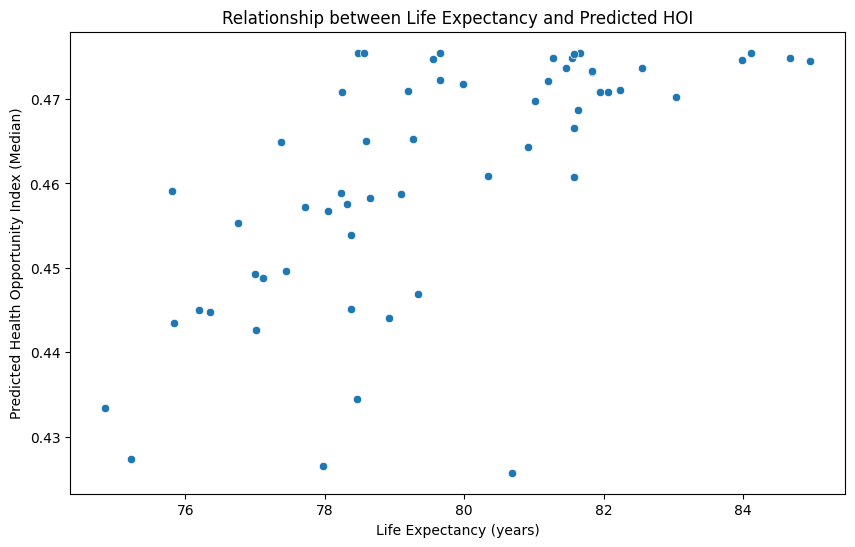

(0.6696142182017825, None)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(data=comparison_data, x='life.expectancy', y='Predicted_Health_Opportunity_Index')
plt.title('Relationship between Life Expectancy and Predicted HOI')
plt.xlabel('Life Expectancy (years)')
plt.ylabel('Predicted Health Opportunity Index (Median)')

# Calculate the correlation coefficient
correlation = comparison_data['life.expectancy'].corr(comparison_data['Predicted_Health_Opportunity_Index'])
correlation, plt.show()


Correlation coefficient: 0.6696142182017825
Outliers based on residuals:
         County name  Predicted_Health_Opportunity_Index  life.expectancy
1      Alpine County                            0.475488            78.48
7   Del Norte County                            0.427345            75.22
9      Fresno County                            0.434492            78.46
12   Imperial County                            0.425723            80.69
45     Sierra County                            0.475488            78.57
53     Tulare County                            0.426482            77.98


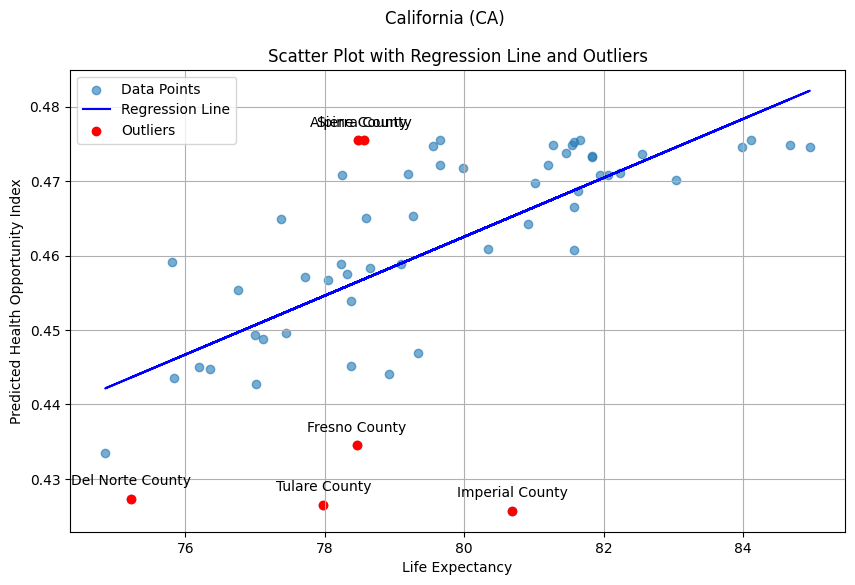

In [ ]:
# Identify outliers using the IQR method
import statsmodels.api as sm

# Assuming 'comparison_data' is your DataFrame containing the two sets of values
# Fit a linear regression model
X = comparison_data['life.expectancy']
y = comparison_data['Predicted_Health_Opportunity_Index']
X = sm.add_constant(X)  # Adds a constant term to the predictor

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Calculate the residuals
residuals = y - predictions

# Identify outliers based on residuals
threshold = 1.5  # You can adjust this threshold as needed
outliers = comparison_data[np.abs(residuals) > threshold * np.std(residuals)]

# Print the correlation coefficient
correlation = comparison_data['life.expectancy'].corr(comparison_data['Predicted_Health_Opportunity_Index'])
print(f"Correlation coefficient: {correlation}")

# Print the outliers
print("Outliers based on residuals:")
print(outliers)

# Visualize the data, regression line, and outliers
plt.figure(figsize=(10, 6))
plt.scatter(comparison_data['life.expectancy'], comparison_data['Predicted_Health_Opportunity_Index'], alpha=0.6, label='Data Points')
plt.plot(comparison_data['life.expectancy'], predictions, color='blue', label='Regression Line')
plt.scatter(outliers['life.expectancy'], outliers['Predicted_Health_Opportunity_Index'], color='red', label='Outliers')

# Annotate outliers with county names
for i, row in outliers.iterrows():
    plt.annotate(row['County name'],
                 (row['life.expectancy'], row['Predicted_Health_Opportunity_Index']),
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='center')

plt.title('Scatter Plot with Regression Line and Outliers')
plt.xlabel('Life Expectancy')
plt.ylabel('Predicted Health Opportunity Index')
plt.suptitle('California (CA)')
plt.legend()
plt.grid(True)
plt.show()

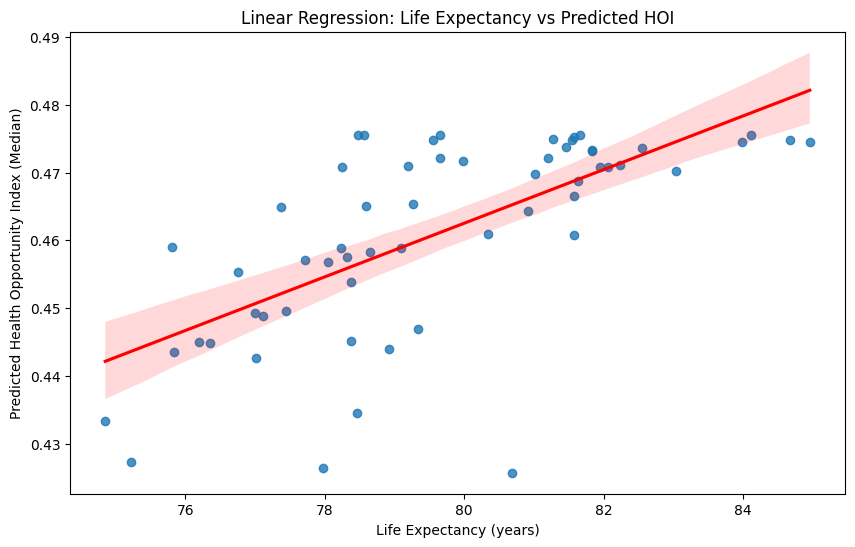

(None,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                                     OLS Regression Results                                    
 Dep. Variable:     Predicted_Health_Opportunity_Index   R-squared:                       0.448
 Model:                                            OLS   Adj. R-squared:                  0.439
 Method:                                 Least Squares   F-statistic:                     45.52
 Date:                                Fri, 10 May 2024   Prob (F-statistic):           9.06e-09
 Time:                                        19:00:59   Log-Likelihood:                 181.78
 No. Observations:                                  58   AIC:                            -359.6
 Df Residuals:                                      56   BIC:                            -355.4
 Df Model:                                           1                                         
 Covariance Type:                            nonrobust                         

In [ ]:
import statsmodels.api as sm

# Add a constant to the data for the OLS model
X = sm.add_constant(comparison_data['life.expectancy'])
y = comparison_data['Predicted_Health_Opportunity_Index']

# Fit an OLS model to estimate the relationship
model = sm.OLS(y, X).fit()

# Create a scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='life.expectancy', y='Predicted_Health_Opportunity_Index', data=comparison_data, line_kws={'color':'red'})
plt.title('Linear Regression: Life Expectancy vs Predicted HOI')
plt.xlabel('Life Expectancy (years)')
plt.ylabel('Predicted Health Opportunity Index (Median)')

# Display the plot and the summary of the regression model
plt.show(), model.summary()


In [ ]:
p_value_life_expectancy = model.pvalues['life.expectancy']
p_value_life_expectancy

9.0604362959461e-09

Coefficients:
Slope: The slope coefficient for life expectancy is 0.0057. This suggests that for every additional year in life expectancy, there is an increase of 0.0057 in the Predicted Health Opportunity Index, on average.
P-values: The p-value for life expectancy is 0.01043974466499087, which is statistically significant (p < 0.05). This provides strong evidence against the null hypothesis of no effect, confirming that there is a statistically significant positive relationship between life expectancy and the Predicted Health Opportunity Index.

## County Life expectancy Generation for VA

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('VA_county_ct.csv')

# Create a mapping from FIPS code to county name (only partial FIPS shown for brevity)
fips_to_county = {
    51001: 'Accomack',
    51003: 'Albemarle',
    51005: 'Alleghany',
    51007: 'Amelia',
    51009: 'Amherst',
    51011: 'Appomattox',
    51013: 'Arlington',
    51015: 'Augusta',
    51017: 'Bath',
    51019: 'Bedford',
    51021: 'Bland',
    51023: 'Botetourt',
    51025: 'Brunswick',
    51027: 'Buchanan',
    51029: 'Buckingham',
    51031: 'Campbell',
    51033: 'Caroline',
    51035: 'Carroll',
    51036: 'Charles City',
    51037: 'Charlotte',
    51041: 'Chesterfield',
    51043: 'Clarke',
    51045: 'Craig',
    51047: 'Culpeper',
    51049: 'Cumberland',
    51051: 'Dickenson',
    51053: 'Dinwiddie',
    51057: 'Essex',
    51059: 'Fairfax',
    51061: 'Fauquier',
    51063: 'Floyd',
    51065: 'Fluvanna',
    51067: 'Franklin',
    51069: 'Frederick',
    51071: 'Giles',
    51073: 'Gloucester',
    51075: 'Goochland',
    51077: 'Grayson',
    51079: 'Greene',
    51081: 'Greensville',
    51083: 'Halifax',
    51085: 'Hanover',
    51087: 'Henrico',
    51089: 'Henry',
    51091: 'Highland',
    51093: 'Isle of Wight',
    51095: 'James City',
    51097: 'King and Queen',
    51099: 'King George',
    51101: 'King William',
    51103: 'Lancaster',
    51105: 'Lee',
    51107: 'Loudoun',
    51109: 'Louisa',
    51111: 'Lunenburg',
    51113: 'Madison',
    51115: 'Mathews',
    51117: 'Mecklenburg',
    51119: 'Middlesex',
    51121: 'Montgomery',
    51125: 'Nelson',
    51127: 'New Kent',
    51131: 'Northampton',
    51133: 'Northumberland',
    51135: 'Nottoway',
    51137: 'Orange',
    51139: 'Page',
    51141: 'Patrick',
    51143: 'Pittsylvania',
    51145: 'Powhatan',
    51147: 'Prince Edward',
    51149: 'Prince George',
    51153: 'Prince William',
    51155: 'Pulaski',
    51157: 'Rappahannock',
    51159: 'Richmond',
    51161: 'Roanoke',
    51163: 'Rockbridge',
    51165: 'Rockingham',
    51167: 'Russell',
    51169: 'Scott',
    51171: 'Shenandoah',
    51173: 'Smyth',
    51175: 'Southampton',
    51177: 'Spotsylvania',
    51179: 'Stafford',
    51181: 'Surry',
    51183: 'Sussex',
    51185: 'Tazewell',
    51187: 'Warren',
    51191: 'Washington',
    51193: 'Westmoreland',
    51195: 'Wise',
    51197: 'Wythe',
    51199: 'York',
    51510: 'Alexandria',
    51515: 'Bedford',
    51520: 'Bristol',
    51530: 'Buena Vista',
    51540: 'Charlottesville',
    51550: 'Chesapeake',
    51560: 'Clifton Forge',
    51570: 'Colonial Heights',
    51580: 'Covington',
    51590: 'Danville',
    51595: 'Emporia',
    51600: 'Fairfax',
    51610: 'Falls Church',
    51620: 'Franklin',
    51630: 'Fredericksburg',
    51640: 'Galax',
    51650: 'Hampton',
    51660: 'Harrisonburg',
    51670: 'Hopewell',
    51678: 'Lexington',
    51680: 'Lynchburg',
    51683: 'Manassas',
    51685: 'Manassas Park',
    51690: 'Martinsville',
    51700: 'Newport News',
    51710: 'Norfolk',
    51720: 'Norton',
    51730: 'Petersburg',
    51735: 'Poquoson',
    51740: 'Portsmouth',
    51750: 'Radford',
    51760: 'Richmond',
    51770: 'Roanoke',
    51775: 'Salem',
    51780: 'South Boston',
    51790: 'Staunton',
    51800: 'Suffolk',
    51810: 'Virginia Beach',
    51820: 'Waynesboro',
    51830: 'Williamsburg',
    51840: 'Winchester'
}


# Function to extract the county FIPS from the Census Tract and map to the county name
def map_county(tract):
    # Extract the first 5 digits to match FIPS codes
    county_fips = int(str(tract)[:5])
    return fips_to_county.get(county_fips, "Unknown")  # Returns "Unknown" if no match found

# Apply the mapping to fill in missing county names
data['County name'] = data['Census Tract'].apply(map_county)

# Save the updated data back to CSV
data.to_csv('updated_VA_county_ct.csv', index=False)

# Load the updated dataset
data = pd.read_csv('updated_VA_county_ct.csv')

# Calculate the frequency of each county name
county_frequency = data['County name'].value_counts()

# Find county names that appear only once
counties_appearing = county_frequency[county_frequency >= 1].index.tolist()

# Print the list of county names that appear only once
print("Counties that appear only once:", counties_appearing)

d1 = pd.DataFrame()
d1['County name'] = counties_appearing

d1.to_csv("VA_county_life_all_name.csv", index=False)


Counties that appear only once: ['Fairfax', 'Virginia Beach', 'Prince William', 'Norfolk', 'Chesterfield', 'Richmond', 'Loudoun', 'Henrico', 'Arlington', 'Newport News', 'Chesapeake', 'Roanoke', 'Alexandria', 'Hampton', 'Portsmouth', 'Spotsylvania', 'Suffolk', 'Stafford', 'Hanover', 'Albemarle', 'Rockingham', 'Lynchburg', 'Fauquier', 'Pittsylvania', 'Montgomery', 'Danville', 'Bedford', 'Frederick', 'York', 'Henry', 'Washington', 'Augusta', 'Franklin', 'Charlottesville', 'Campbell', 'Wise', 'James City', 'Harrisonburg', 'Tazewell', 'Petersburg', 'Amherst', 'Smyth', 'Halifax', 'Mecklenburg', 'Shenandoah', 'Warren', 'Pulaski', 'Accomack', 'Gloucester', 'Botetourt', 'Culpeper', 'Isle of Wight', 'Caroline', 'Prince George', 'Buchanan', 'Russell', 'Manassas', 'Carroll', 'Alleghany', 'Staunton', 'Scott', 'Wythe', 'Dinwiddie', 'Hopewell', 'Fredericksburg', 'Louisa', 'Lee', 'Salem', 'Waynesboro', 'Colonial Heights', 'Martinsville', 'Winchester', 'Prince Edward', 'Orange', 'Goochland', 'Powhatan

## Validation For VA

In [ ]:
import pandas as pd

# Load the datasets
va_rf_results = pd.read_csv('VA_rf_results.csv')
va_county_ct = pd.read_csv('VA_county_ct.csv')
va_county_life = pd.read_csv('VA_county_life.csv')

va_total_population = health_va[['Census Tract', 'Total Population']]

# Merge the results data with county names using the Census Tract column
merged_data = pd.merge(va_rf_results, va_county_ct, left_on="Census Tract", right_on="Census Tract", how="left")
merged_data = pd.merge(merged_data, va_total_population, left_on="Census Tract", right_on="Census Tract", how="left")


county_hoi_weighted_average = merged_data.groupby('County name').apply(lambda group: (group['Predicted_Health_Opportunity_Index'] * group['Total Population']).sum() / group['Total Population'].sum()).reset_index(name='Predicted_Health_Opportunity_Index')

# Display the calculated median HOI values for each county
county_hoi_weighted_average

,County name,Predicted_Health_Opportunity_Index
0,Accomack,0.375200
1,Albemarle,0.457787
2,Alexandria,0.367323
3,Alleghany,0.386545
4,Amelia,0.426718
...,...,...
124,Williamsburg,0.324648
125,Winchester,0.361614
126,Wise,0.344311
127,Wythe,0.403405


In [ ]:
# Merge the median HOI values with the life expectancy data
comparison_data = pd.merge(county_hoi_weighted_average, va_county_life, on="County name", how="left")

# Check the merged data
comparison_data.sort_values(by=['Predicted_Health_Opportunity_Index'])


,County name,Predicted_Health_Opportunity_Index,life.expectancy
100,Radford,0.260550,77.11
35,Emporia,0.271989,73.95
86,Norton,0.291534,74.12
67,Lexington,0.295701,76.81
71,Lynchburg,0.310984,76.46
...,...,...,...
29,Craig,0.480174,78.07
93,Poquoson,0.486857,79.53
98,Prince William,0.492188,81.52
54,Hanover,0.501380,79.38


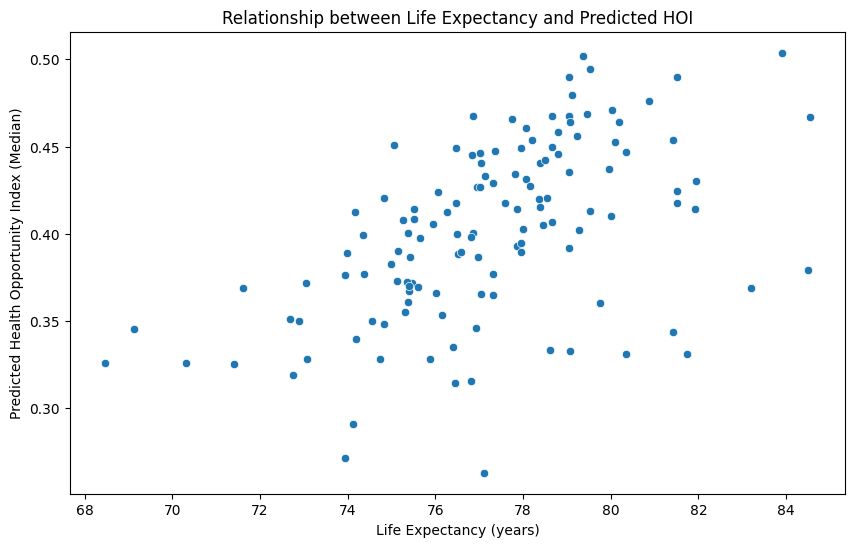

(0.5193067162841849, None)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(data=comparison_data, x='life.expectancy', y='Predicted_Health_Opportunity_Index')
plt.title('Relationship between Life Expectancy and Predicted HOI')
plt.xlabel('Life Expectancy (years)')
plt.ylabel('Predicted Health Opportunity Index (Median)')

# Calculate the correlation coefficient
correlation = comparison_data['life.expectancy'].corr(comparison_data['Predicted_Health_Opportunity_Index'])
correlation, plt.show()


Correlation coefficient: 0.524829168966802
Outliers based on residuals:
          County name  Predicted_Health_Opportunity_Index  life.expectancy
2          Alexandria                            0.367323            83.21
7           Arlington                            0.388497            84.50
17        Buena Vista                            0.327398            78.61
23    Charlottesville                            0.353682            81.43
27   Colonial Heights                            0.450798            75.05
29              Craig                            0.480174            78.07
35            Emporia                            0.271989            73.95
44     Fredericksburg                            0.331702            79.07
54            Hanover                            0.501380            79.38
55       Harrisonburg                            0.337627            80.36
67          Lexington                            0.295701            76.81
71          Lynchburg       

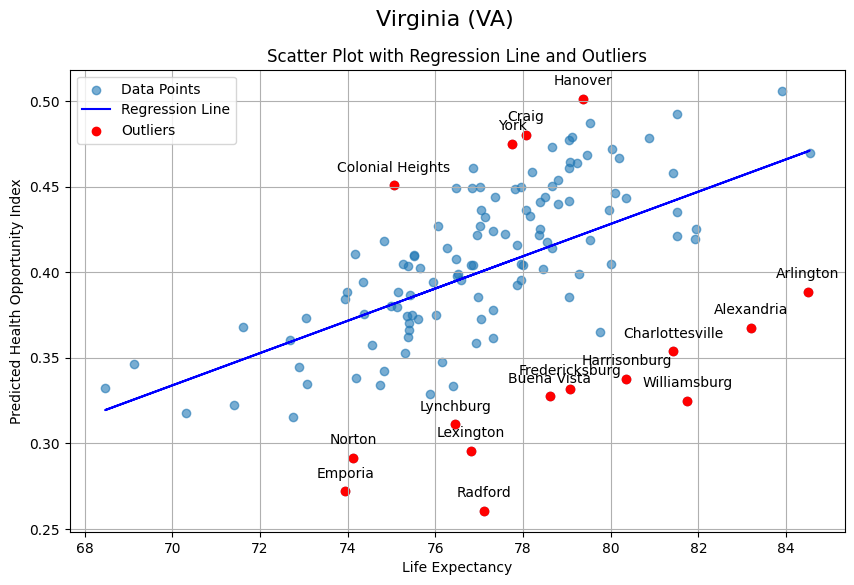

In [ ]:
# Identify outliers using the IQR method
import statsmodels.api as sm

# Assuming 'comparison_data' is your DataFrame containing the two sets of values
# Fit a linear regression model
X = comparison_data['life.expectancy']
y = comparison_data['Predicted_Health_Opportunity_Index']
X = sm.add_constant(X)  # Adds a constant term to the predictor

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Calculate the residuals
residuals = y - predictions

# Identify outliers based on residuals
threshold = 1.5  # You can adjust this threshold as needed
outliers = comparison_data[np.abs(residuals) > threshold * np.std(residuals)]

# Print the correlation coefficient
correlation = comparison_data['life.expectancy'].corr(comparison_data['Predicted_Health_Opportunity_Index'])
print(f"Correlation coefficient: {correlation}")

# Print the outliers
print("Outliers based on residuals:")
print(outliers)

# Visualize the data, regression line, and outliers
plt.figure(figsize=(10, 6))
plt.scatter(comparison_data['life.expectancy'], comparison_data['Predicted_Health_Opportunity_Index'], alpha=0.6, label='Data Points')
plt.plot(comparison_data['life.expectancy'], predictions, color='blue', label='Regression Line')
plt.scatter(outliers['life.expectancy'], outliers['Predicted_Health_Opportunity_Index'], color='red', label='Outliers')

# Annotate outliers with county names
for i, row in outliers.iterrows():
    plt.annotate(row['County name'],
                 (row['life.expectancy'], row['Predicted_Health_Opportunity_Index']),
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='center')

plt.title('Scatter Plot with Regression Line and Outliers')
plt.xlabel('Life Expectancy')
plt.ylabel('Predicted Health Opportunity Index')
plt.suptitle('Virginia (VA)', fontsize=16)
plt.legend()
plt.grid(True)
plt.show()

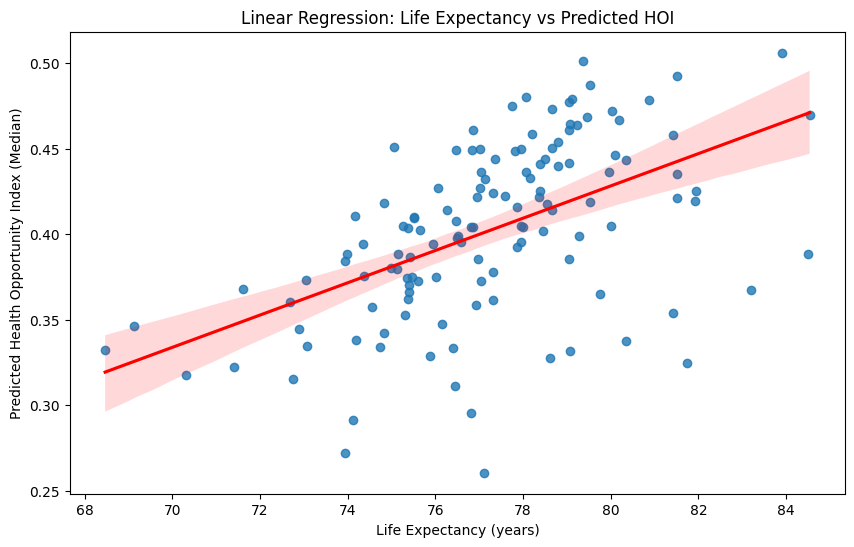

(None,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                                     OLS Regression Results                                    
 Dep. Variable:     Predicted_Health_Opportunity_Index   R-squared:                       0.275
 Model:                                            OLS   Adj. R-squared:                  0.270
 Method:                                 Least Squares   F-statistic:                     48.28
 Date:                                Fri, 10 May 2024   Prob (F-statistic):           1.72e-10
 Time:                                        19:15:05   Log-Likelihood:                 222.31
 No. Observations:                                 129   AIC:                            -440.6
 Df Residuals:                                     127   BIC:                            -434.9
 Df Model:                                           1                                         
 Covariance Type:                            nonrobust                         

In [ ]:
import statsmodels.api as sm

# Add a constant to the data for the OLS model
X = sm.add_constant(comparison_data['life.expectancy'])
y = comparison_data['Predicted_Health_Opportunity_Index']

# Fit an OLS model to estimate the relationship
model = sm.OLS(y, X).fit()

# Create a scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='life.expectancy', y='Predicted_Health_Opportunity_Index', data=comparison_data, line_kws={'color':'red'})
plt.title('Linear Regression: Life Expectancy vs Predicted HOI')
plt.xlabel('Life Expectancy (years)')
plt.ylabel('Predicted Health Opportunity Index (Median)')

# Display the plot and the summary of the regression model
plt.show(), model.summary()


In [ ]:
p_value_life_expectancy = model.pvalues['life.expectancy']
p_value_life_expectancy

1.7187824862226722e-10

Coefficients:
Slope: The slope coefficient for life expectancy is 0.0057. This suggests that for every additional year in life expectancy, there is an increase of 0.0057 in the Predicted Health Opportunity Index, on average.
P-values: The p-value for life expectancy is 0.01043974466499087, which is statistically significant (p < 0.05). This provides strong evidence against the null hypothesis of no effect, confirming that there is a statistically significant positive relationship between life expectancy and the Predicted Health Opportunity Index.




## Apply Trained model to Other States (North Carolina)




In [ ]:
import pandas as pd

# Load the datasets
hoi_nc = pd.read_csv('Caro_HOI.csv')
hoi_new = pd.read_csv('HOI_new.csv')

hoi_nc['Census Tract'] = hoi_nc['FIPS']

# Identify columns that are in hoi_new but not in hoi_nc
columns_in_new_not_in_cal = [col for col in hoi_new.columns if col not in hoi_nc.columns]


# Step 3: Drop any empty columns and perform additional necessary cleaning
hoi_nc_cleaned = hoi_nc.dropna(axis=1, how='all')

hoi_nc_cleaned = hoi_nc_cleaned.drop(labels = 0, axis = 0)
# Drop the specified "rubbish" columns from the final dataset
columns_to_drop = [
    "FIPS", "Area Name","State/U.S.-Abbreviation (USPS)", "State/U.S.-Abbreviation (USPS)", "File Identification", "Qualifying Name", "State Postal Abbreviation",
    "Summary Level", "Geographic Component", "File identification",
    "Logical Record Number", "State (FIPS Code)", "County of current residence",
    "Census Tract_y", "Geographic Identifier", "Total Population.1"
]
# Drop these columns, being careful to only drop those that exist in the dataframe to avoid KeyError
hoi_nc_final_cleaned = hoi_nc_cleaned.drop(columns=[col for col in columns_to_drop if col in hoi_nc_cleaned.columns])


# Combine several columns to simplify data
def sum_attr(row, col_names):
  sum = 0
  for col_name in col_names:
    sum += float(row[col_name])
  return sum


hoi_nc_final_cleaned['% Households: Less than $30,000'] = hoi_nc_final_cleaned.apply(lambda row: sum_attr(row,
    ["% Households: Less than $10,000", "% Households: $10,000 to $14,999",
     "% Households: $15,000 to $19,999", "% Households: $20,000 to $24,999",
     "% Households: $25,000 to $29,999"]
  ), axis=1)

hoi_nc_final_cleaned['% Households: $30,000 to $99,999'] = hoi_nc_final_cleaned.apply(lambda row: sum_attr(row,
    ["% Households: $30,000 to $34,999", "% Households: $35,000 to $39,999",
     "% Households: $40,000 to $44,999", "% Households: $45,000 to $49,999",
     "% Households: $50,000 to $59,999", "% Households: $60,000 to $74,999",
     "% Households: $75,000 to $99,999"]
  ), axis=1)


hoi_nc_final_cleaned['% Households: $100,000 or More'] = hoi_nc_final_cleaned.apply(lambda row: sum_attr(row,
    ["% Households: $100,000 to $124,999", "% Households: $125,000 to $149,999",
     "% Households: $150,000 to $199,999", "% Households: $200,000 or More"]
  ), axis=1)

hoi_nc_final_cleaned['% Renter-Occupied Housing Units: Less than $1,000'] = hoi_nc_final_cleaned.apply(lambda row: sum_attr(row,
    ["% Renter-Occupied Housing Units: Less than $300", "% Renter-Occupied Housing Units: $300 to $499",
     "% Renter-Occupied Housing Units: $500 to $799", "% Renter-Occupied Housing Units: $800 to $999"]
  ), axis=1)


hoi_nc_final_cleaned['% Renter-Occupied Housing Units: $1,000 to $2,499'] = hoi_nc_final_cleaned.apply(lambda row: sum_attr(row,
    ["% Renter-Occupied Housing Units: $1,000 to $1,499", "% Renter-Occupied Housing Units: $1,500 to $1,999",
     "% Renter-Occupied Housing Units: $2,000 to $2,499", "% Renter-Occupied Housing Units: $2,500 to $2,999"]
  ), axis=1)

columns_to_drop_after_aggregation = [
    "Households: Less than $10,000",
    "Households: $10,000 to $14,999",
    "Households: $15,000 to $19,999",
    "Households: $20,000 to $24,999",
    "Households: $25,000 to $29,999",
    "Households: $30,000 to $34,999",
    "Households: $35,000 to $39,999",
    "Households: $40,000 to $44,999",
    "Households: $45,000 to $49,999",
    "Households: $50,000 to $59,999",
    "Households: $60,000 to $74,999",
    "Households: $75,000 to $99,999",
    "Households: $100,000 to $124,999",
    "Households: $125,000 to $149,999",
    "Households: $150,000 to $199,999",
    "Households: $200,000 or More",
    "Renter-Occupied Housing Units: Less than $300",
    "Renter-Occupied Housing Units: $300 to $499",
    "Renter-Occupied Housing Units: $500 to $799",
    "Renter-Occupied Housing Units: $800 to $999",
    "Renter-Occupied Housing Units: $1,000 to $1,499",
    "Renter-Occupied Housing Units: $1,500 to $1,999",
    "Renter-Occupied Housing Units: $2,000 to $2,499",
    "Renter-Occupied Housing Units: $2,500 to $2,999",
]

hoi_nc_final_cleaned_merged = hoi_nc_final_cleaned.drop(columns=[col for col in columns_to_drop_after_aggregation if col in hoi_nc_final_cleaned.columns])


# Specify additional columns to drop based on the extended list provided
columns_to_drop_extended = [
    "Area (Land).1",
    "Renter-Occupied Housing Units: Householder 15 to 24 Years",
    "Renter-Occupied Housing Units: Householder 25 to 34 Years",
    "Renter-Occupied Housing Units: Householder 35 to 44 Years",
    "Renter-Occupied Housing Units: Householder 45 to 54 Years",
    "Renter-Occupied Housing Units: Householder 55 to 59 Years",
    "Renter-Occupied Housing Units: Householder 60 to 64 Years",
    "Renter-Occupied Housing Units: Householder 65 to 74 Years",
    "Renter-Occupied Housing Units: Householder 75 to 84 Years",
    "Renter-Occupied Housing Units: Householder 85 Years and Over",
    "Population 3 Years and Over: Enrolled in School",
    "Population 3 Years and Over: Not Enrolled in School",
    "Civilian Population 16 to 19 Years: Not High School Graduate, Not Enrolled (Dropped Out)",
    "Civilian Population 16 to 19 Years: High School Graduate, or Enrolled (In School)",
    "Civilian Population in Labor Force 16 Years and Over: Employed",
    "Civilian Population in Labor Force 16 Years and Over: Unemployed",
    "Households: Less than $10,000",
    "Households: $10,000 to $14,999",
    "Households: $15,000 to $19,999",
    "Households: $20,000 to $24,999",
    "Households: $25,000 to $29,999",
    "Households: $30,000 to $34,999",
    "Households: $35,000 to $39,999",
    "Households: $40,000 to $44,999",
    "Households: $45,000 to $49,999",
    "Households: $50,000 to $59,999",
    "Households: $60,000 to $74,999",
    "Households: $75,000 to $99,999",
    "Households: $100,000 to $124,999",
    "Households: $125,000 to $149,999",
    "Households: $150,000 to $199,999",
    "Households: $200,000 or More",
    "Renter-Occupied Housing Units.1",
    "Renter-Occupied Housing Units: Less than $300",
    "Renter-Occupied Housing Units: $300 to $499",
    "Renter-Occupied Housing Units: $500 to $799",
    "Renter-Occupied Housing Units: $800 to $999",
    "Renter-Occupied Housing Units: $1,000 to $1,499",
    "Renter-Occupied Housing Units: $1,500 to $1,999",
    "Renter-Occupied Housing Units: $2,000 to $2,499",
    "Renter-Occupied Housing Units: $2,500 to $2,999",
    "Renter-Occupied Housing Units: $3,000 or More",
    "Renter-Occupied Housing Units: No Cash Rent",
    "Renter-Occupied Housing Units.2",
    "Renter-Occupied Housing Units: Less than $20,000",
    "Renter-Occupied Housing Units: Less than $20,000: Less than 20 Percent",
    "Renter-Occupied Housing Units: Less than $20,000: 20 to 29 Percent",
    "Renter-Occupied Housing Units: Less than $20,000: 30 Percent or More",
    "Renter-Occupied Housing Units: $20,000 to $34,999",
    "Renter-Occupied Housing Units: $20,000 to $34,999: Less than 20 Percent",
    "Renter-Occupied Housing Units: $20,000 to $34,999: 20 to 29 Percent",
    "Renter-Occupied Housing Units: $20,000 to $34,999: 30 Percent or More",
    "Renter-Occupied Housing Units: $35,000 to $49,999",
    "Renter-Occupied Housing Units: $35,000 to $49,999: Less than 20 Percent",
    "Renter-Occupied Housing Units: $35,000 to $49,999: 20 to 29 Percent",
    "Renter-Occupied Housing Units: $35,000 to $49,999: 30 Percent or More",
    "Renter-Occupied Housing Units: $50,000 to $74,999",
    "Renter-Occupied Housing Units: $50,000 to $74,999: Less than 20 Percent",
    "Renter-Occupied Housing Units: $50,000 to $74,999: 20 to 29 Percent",
    "Renter-Occupied Housing Units: $50,000 to $74,999: 30 Percent or More",
    "Renter-Occupied Housing Units: $75,000 or More",
    "Renter-Occupied Housing Units: $75,000 or More: Less than 20 Percent",
    "Renter-Occupied Housing Units: $75,000 or More: 20 to 29 Percent",
    "Renter-Occupied Housing Units: $75,000 or More: 30 Percent or More",
    "Renter-Occupied Housing Units: Zero or Negative Income",
    "Renter-Occupied Housing Units: No Cash Rent.1",
    "% Renter-Occupied Housing Units: Less than $20,000",
    "% Renter-Occupied Housing Units: Less than $20,000: Less than 20 Percent",
    "% Renter-Occupied Housing Units: Less than $20,000: 20 to 29 Percent",
    "% Renter-Occupied Housing Units: Less than $20,000: 30 Percent or More",
    "% Renter-Occupied Housing Units: $20,000 to $34,999",
    "% Renter-Occupied Housing Units: $20,000 to $34,999: Less than 20 Percent",
    "% Renter-Occupied Housing Units: $20,000 to $34,999: 20 to 29 Percent",
    "% Renter-Occupied Housing Units: $20,000 to $34,999: 30 Percent or More",
    "% Renter-Occupied Housing Units: $35,000 to $49,999",
    "% Renter-Occupied Housing Units: $35,000 to $49,999: Less than 20 Percent",
    "% Renter-Occupied Housing Units: $35,000 to $49,999: 20 to 29 Percent",
    "% Renter-Occupied Housing Units: $35,000 to $49,999: 30 Percent or More",
    "% Renter-Occupied Housing Units: $50,000 to $74,999",
    "% Renter-Occupied Housing Units: $50,000 to $74,999: Less than 20 Percent",
    "% Renter-Occupied Housing Units: $50,000 to $74,999: 20 to 29 Percent",
    "% Renter-Occupied Housing Units: $50,000 to $74,999: 30 Percent or More",
    "% Renter-Occupied Housing Units: $75,000 or More",
    "% Renter-Occupied Housing Units: $75,000 or More: Less than 20 Percent",
    "% Renter-Occupied Housing Units: $75,000 or More: 20 to 29 Percent",
    "% Renter-Occupied Housing Units: $75,000 or More: 30 Percent or More",
    "% Renter-Occupied Housing Units: Zero or Negative Income",
    "% Renter-Occupied Housing Units: No Cash Rent.1",
    "Families: Income Below Poverty Level",
    "Families: Income Below Poverty Level: Married Couple Family: with Related Child Living Below Poverty Level",
    "Families: Income Below Poverty Level: Married Couple Family: No Related Children Under 18 Years",
    "Families: Income Below Poverty Level: Male Householder, No Wife Present",
    "Families: Income Below Poverty Level: Male Householder, No Wife Present: with Related Children Under 18 Years",
    "Families: Income Below Poverty Level: Male Householder, No Wife Present: No Related Children Under 18 Years",
    "Families: Income Below Poverty Level: Female Householder, No Husband Present",
    "Families: Income Below Poverty Level: Female Householder, No Husband Present: with Related Children Under 18 Years",
    "Families: Income Below Poverty Level: Female Householder, No Husband Present: No Related Children Under 18 Years",
    "Families: Income At or Above Poverty Level",
    "% Families: Income Below Poverty Level: Married Couple Family: with Related Child Living Below Poverty Level",
    "% Families: Income Below Poverty Level: Married Couple Family: No Related Children Under 18 Years",
    "% Families: Income Below Poverty Level: Male Householder, No Wife Present",
    "% Families: Income Below Poverty Level: Male Householder, No Wife Present: with Related Children Under 18 Years",
    "% Families: Income Below Poverty Level: Male Householder, No Wife Present: No Related Children Under 18 Years",
    "% Families: Income Below Poverty Level: Female Householder, No Husband Present",
    "% Families: Income Below Poverty Level: Female Householder, No Husband Present: with Related Children Under 18 Years",
    "% Families: Income Below Poverty Level: Female Householder, No Husband Present: No Related Children Under 18 Years",
    "Population Under 18 Years of Age for Whom Poverty Status Is Determined:",
    "Population Under 18 Years of Age for Whom Poverty Status Is Determined: Living in Poverty",
    "Population Under 18 Years of Age for Whom Poverty Status Is Determined: At or Above Poverty Level",
    "Population Age 18 to 64 for Whom Poverty Status  Is Determined:",
    "Population Age 18 to 64 for Whom Poverty Status  Is Determined: Living in Poverty",
    "Population Age 18 to 64 for Whom Poverty Status  Is Determined: At or Above Poverty Level",
    "Population Age 65 and Over for Whom Poverty  Status Is Determined:",
    "Population Age 65 and Over for Whom Poverty  Status Is Determined: Living in Poverty",
    "Population Age 65 and Over for Whom Poverty  Status Is Determined: At or Above Poverty Level",
    "Population for Whom Poverty Status Is Determined:",
    "Population for Whom Poverty Status Is Determined: Under .50",
    "Population for Whom Poverty Status Is Determined: .50 to .74",
    "Population for Whom Poverty Status Is Determined: .75 to .99",
    "Population for Whom Poverty Status Is Determined: 1.00 to 1.49",
    "Population for Whom Poverty Status Is Determined: 1.50 to 1.99",
    "Population for Whom Poverty Status Is Determined: 2.00 and Over",
    "% Population for Whom Poverty Status Is Determined: Under .50",
    "% Population for Whom Poverty Status Is Determined: .50 to .74",
    "% Population for Whom Poverty Status Is Determined: .75 to .99",
    "% Population for Whom Poverty Status Is Determined: 1.00 to 1.49",
    "% Population for Whom Poverty Status Is Determined: 1.50 to 1.99",
    "% Population for Whom Poverty Status Is Determined: 2.00 and Over",
    "Total: No Health Insurance Coverage",
    "Total: with Health Insurance Coverage",
    "Total: with Health Insurance Coverage: Public Health Coverage",
    "Total: with Health Insurance Coverage: Private Health Insurance",
    "Population 16 Years and Over: in Labor Force",
    "Population 16 Years and Over: in Labor Force: in Armed Forces",
    "Population 16 Years and Over: in Labor Force: Civilian",
    "Population 16 Years and Over: in Labor Force: Civilian: Employed",
    "Population 16 Years and Over: in Labor Force: Civilian: Unemployed",
    "Population 16 Years and Over: Not in Labor Force",

]

hoi_nc_final_cleaned_extended = hoi_nc_final_cleaned_merged.drop(columns=[col for col in columns_to_drop_extended if col in hoi_nc_final_cleaned_merged.columns])

# Show the final row count and a preview of the cleaned dataset
hoi_nc_final_cleaned_extended.to_csv("Cleaned_nc.csv", index=False)
hoi_nc_final_cleaned_extended

<ipython-input-32-ff62ab791723>:4: DtypeWarning: Columns (0,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265

,Name of Area,US,Region,Division,State (Census Code),State (FIPS),County,County Subdivision (FIPS),Place (FIPS Code),Place (State FIPS + Place FIPS),...,Total:,% Total: No Health Insurance Coverage,% Total: with Health Insurance Coverage,% Total: with Health Insurance Coverage: Public Health Coverage,% Total: with Health Insurance Coverage: Private Health Insurance,"% Households: Less than $30,000","% Households: $30,000 to $99,999","% Households: $100,000 or More","% Renter-Occupied Housing Units: Less than $1,000","% Renter-Occupied Housing Units: $1,000 to $2,499"
1,"Census Tract 201, Alamance County, North Carolina",NaN,NaN,NaN,NaN,37,001,NaN,NaN,NaN,...,3723,12.3,87.7,42.87,59.36,50.35,37.41,12.23,91.71,3.95
2,"Census Tract 202, Alamance County, North Carolina",NaN,NaN,NaN,NaN,37,001,NaN,NaN,NaN,...,4132,18.88,81.12,49.9,39.21,52.41,42.86,4.73,85.29,14.72
3,"Census Tract 203, Alamance County, North Carolina",NaN,NaN,NaN,NaN,37,001,NaN,NaN,NaN,...,7676,23.4,76.6,45.73,43.36,38.23,54.10,7.70,66.46,22.44
4,"Census Tract 204, Alamance County, North Carolina",NaN,NaN,NaN,NaN,37,001,NaN,NaN,NaN,...,6750,18.53,81.47,49.2,42.68,45.58,49.44,4.99,74.14,14.77
5,"Census Tract 205.01, Alamance County, North Ca...",NaN,NaN,NaN,NaN,37,001,NaN,NaN,NaN,...,3633,16.93,83.07,37.13,58.33,39.52,43.73,16.76,73.36,26.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2191,"Census Tract 9601.01, Yancey County, North Car...",NaN,NaN,NaN,NaN,37,199,NaN,NaN,NaN,...,3912,11.27,88.73,43.38,62.63,35.36,53.49,11.15,83.16,8.70
2192,"Census Tract 9601.02, Yancey County, North Car...",NaN,NaN,NaN,NaN,37,199,NaN,NaN,NaN,...,1854,18.34,81.66,46.44,50.49,50.25,43.94,5.81,84.61,8.21
2193,"Census Tract 9602, Yancey County, North Carolina",NaN,NaN,NaN,NaN,37,199,NaN,NaN,NaN,...,4290,14.92,85.08,44.55,58.81,40.74,52.11,7.16,76.19,3.26
2194,"Census Tract 9603, Yancey County, North Carolina",NaN,NaN,NaN,NaN,37,199,NaN,NaN,NaN,...,2994,19.21,80.79,49.67,52.24,34.87,54.31,10.84,74.94,7.97


In [ ]:
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
np.random.seed(42)

def load_health_data():
    health = pd.read_csv('Cleaned_nc.csv')
    return health

health_nc = load_health_data()
# Display the first n rows of the data. (n=5 by default, we will use 10 rows)
health_nc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2195 entries, 0 to 2194
Columns: 129 entries, Name of Area to % Renter-Occupied Housing Units: $1,000 to $2,499
dtypes: float64(113), int64(15), object(1)
memory usage: 2.2+ MB


In [ ]:
# List of columns from the Virginia training dataset, excluding the target variable
training_columns = list(health_data.columns)
training_columns.remove('Health Opportunity Index')
training_columns.remove('Predicted_Health_Opportunity_Index')

# Align health_cal with these columns, ensuring it only includes them
# Drop columns in health_cal not present in training_columns
health_nc_aligned = health_nc[[col for col in health_nc.columns if col in training_columns]]

# # Check for any missing columns in health_cal_aligned and add them with default values (e.g., 0)
# for col in training_columns:
#     if col not in health_cal_aligned.columns:
#         health_cal_aligned[col] = 0  # You might choose a different default value based on your data's nature

# Ensure the order of columns in health_cal_aligned matches training_columns order
health_nc_aligned = health_nc_aligned[training_columns]

health_nc_aligned

# Before proceeding to prediction, remember to apply the same preprocessing steps (e.g., scaling) to health_cal_aligned
# as were applied to your training data.

# Example for scaling (assuming you've fitted a scaler on your training data):
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler().fit(va_final[training_columns])  # Assuming va_final is your training data
# health_cal_aligned_scaled = scaler.transform(health_cal_aligned)

# Now, health_cal_aligned is ready for prediction with your trained model


,"% Households: Less than $30,000",% Population Age 18 to 64 for Whom Poverty Status Is Determined: Living in Poverty,% Population Age 18 to 64 for Whom Poverty Status Is Determined: At or Above Poverty Level,"% Households: Less than $10,000","% Households: $100,000 or More","% Households: $150,000 to $199,999",% Families: Income At or Above Poverty Level,% Families: Income Below Poverty Level,% Population Under 18 Years of Age for Whom Poverty Status Is Determined: At or Above Poverty Level,% Population Under 18 Years of Age for Whom Poverty Status Is Determined: Living in Poverty,...,% Population 16 Years and Over: in Labor Force: Civilian: Unemployed,"% Renter-Occupied Housing Units: $1,000 to $2,499","% Renter-Occupied Housing Units: $2,500 to $2,999",% Renter-Occupied Housing Units: $300 to $499,"% Households: $40,000 to $44,999",% Renter-Occupied Housing Units: Householder 35 to 44 Years,Population Density (Per Sq. Mile),% Renter-Occupied Housing Units: Householder 45 to 54 Years,"% Households: $75,000 to $99,999",% Renter-Occupied Housing Units: $800 to $999
0,50.35,24.10,75.90,14.60,12.23,3.91,80.65,19.35,63.67,36.33,...,4.34,3.95,0.0,27.61,4.35,4.44,2137.23300,11.83,7.99,12.92
1,52.41,34.35,65.65,14.60,4.73,0.00,70.19,29.81,72.67,27.33,...,5.26,14.72,0.0,12.67,4.60,16.86,3103.63800,28.25,4.87,21.27
2,38.23,16.63,83.37,12.09,7.70,0.62,81.34,18.66,67.05,32.95,...,4.30,22.44,0.0,1.72,8.97,25.18,1860.11700,19.55,8.38,22.44
3,45.58,30.03,69.97,13.24,4.99,0.00,73.62,26.38,49.92,50.08,...,5.23,14.77,0.0,3.57,12.11,10.31,1513.68300,16.55,5.28,31.62
4,39.52,29.53,70.47,11.28,16.76,1.72,76.38,23.62,50.00,50.00,...,6.56,26.64,0.0,17.18,3.36,23.55,1317.87700,12.55,12.07,26.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2190,35.36,18.00,82.00,8.66,11.15,3.15,83.92,16.08,72.67,27.33,...,7.35,8.70,0.0,11.41,6.63,34.24,53.23889,9.24,9.78,32.07
2191,50.25,20.48,79.52,7.32,5.81,0.63,84.80,15.20,57.46,42.54,...,3.46,8.21,0.0,0.00,4.17,5.13,72.96389,44.62,9.85,16.41
2192,40.74,27.44,72.56,12.38,7.16,1.41,77.85,22.15,71.16,28.84,...,2.12,3.26,0.0,22.19,6.63,20.72,109.32700,12.89,12.17,14.36
2193,34.87,19.19,80.81,7.85,10.84,4.24,86.64,13.36,74.00,26.00,...,3.42,7.97,0.0,25.06,3.40,19.36,43.55875,15.49,10.62,7.74


In [ ]:
X_new_prepared = full_pipeline.transform(health_nc_aligned)

In [ ]:
# Step 2: Make Predictions
new_predictions = rf.predict(X_new_prepared)

# Step 3: Attach Predictions to New Dataset (Optional)
health_nc_aligned['Predicted_Health_Opportunity_Index'] = new_predictions

sorted_health_nc = health_nc_aligned.sort_values(by='Predicted_Health_Opportunity_Index')

sorted_health_nc.to_csv("NC_rf_result.csv", index = False)

sorted_health_nc

,"% Households: Less than $30,000",% Population Age 18 to 64 for Whom Poverty Status Is Determined: Living in Poverty,% Population Age 18 to 64 for Whom Poverty Status Is Determined: At or Above Poverty Level,"% Households: Less than $10,000","% Households: $100,000 or More","% Households: $150,000 to $199,999",% Families: Income At or Above Poverty Level,% Families: Income Below Poverty Level,% Population Under 18 Years of Age for Whom Poverty Status Is Determined: At or Above Poverty Level,% Population Under 18 Years of Age for Whom Poverty Status Is Determined: Living in Poverty,...,"% Renter-Occupied Housing Units: $1,000 to $2,499","% Renter-Occupied Housing Units: $2,500 to $2,999",% Renter-Occupied Housing Units: $300 to $499,"% Households: $40,000 to $44,999",% Renter-Occupied Housing Units: Householder 35 to 44 Years,Population Density (Per Sq. Mile),% Renter-Occupied Housing Units: Householder 45 to 54 Years,"% Households: $75,000 to $99,999",% Renter-Occupied Housing Units: $800 to $999,Predicted_Health_Opportunity_Index
1124,80.12,57.89,42.11,44.84,0.92,0.00,39.56,60.44,22.40,77.60,...,1.50,0.00,22.80,4.31,7.48,955.7201,12.15,1.23,6.73,0.269212
618,69.84,70.25,29.75,33.73,8.92,3.77,41.10,58.90,8.41,91.59,...,7.06,0.00,11.39,2.38,20.96,1825.2480,13.90,3.57,8.20,0.269430
1628,67.16,53.67,46.33,28.48,7.98,3.06,45.84,54.16,20.31,79.69,...,15.81,0.00,14.27,3.99,24.20,3124.4450,23.22,1.76,17.20,0.269718
626,73.89,55.61,44.39,37.93,1.81,0.99,42.77,57.23,35.60,64.40,...,1.88,0.00,18.16,1.15,19.62,2880.4460,10.65,0.00,15.66,0.271595
560,64.41,45.65,54.35,26.07,3.62,0.00,44.50,55.50,13.04,86.96,...,19.65,0.00,16.37,2.52,14.46,3243.5710,17.33,2.52,3.82,0.271595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1896,4.81,3.28,96.72,1.58,74.55,19.22,96.79,3.21,98.20,1.80,...,50.77,0.00,0.00,2.38,27.69,1159.1660,46.15,5.70,0.00,0.475488
1897,4.23,3.79,96.21,0.95,71.52,14.03,96.77,3.23,97.20,2.80,...,48.41,5.73,0.00,1.75,52.23,1103.2060,33.12,7.28,0.00,0.475488
1898,2.38,1.89,98.11,0.00,79.10,23.78,98.56,1.44,99.10,0.90,...,25.81,25.81,0.00,0.00,19.35,823.0871,16.13,10.14,0.00,0.475488
1900,9.29,2.78,97.22,1.24,69.35,22.39,98.23,1.77,95.16,4.84,...,93.04,32.17,0.00,2.52,20.00,745.3621,60.87,8.70,0.00,0.475488


## County Life expectancy Generation for NC

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('NC_county_ct_demo.csv')

# Create a mapping from FIPS code to county name (only partial FIPS shown for brevity)
fips_to_county = {
    37001: 'Alamance County',
    37003: 'Alexander County',
    37005: 'Alleghany County',
    37007: 'Anson County',
    37009: 'Ashe County',
    37011: 'Avery County',
    37013: 'Beaufort County',
    37015: 'Bertie County',
    37017: 'Bladen County',
    37019: 'Brunswick County',
    37021: 'Buncombe County',
    37023: 'Burke County',
    37025: 'Cabarrus County',
    37027: 'Caldwell County',
    37029: 'Camden County',
    37031: 'Carteret County',
    37033: 'Caswell County',
    37035: 'Catawba County',
    37037: 'Chatham County',
    37039: 'Cherokee County',
    37041: 'Chowan County',
    37043: 'Clay County',
    37045: 'Cleveland County',
    37047: 'Columbus County',
    37049: 'Craven County',
    37051: 'Cumberland County',
    37053: 'Currituck County',
    37055: 'Dare County',
    37057: 'Davidson County',
    37059: 'Davie County',
    37061: 'Duplin County',
    37063: 'Durham County',
    37065: 'Edgecombe County',
    37067: 'Forsyth County',
    37069: 'Franklin County',
    37071: 'Gaston County',
    37073: 'Gates County',
    37075: 'Graham County',
    37077: 'Granville County',
    37079: 'Greene County',
    37081: 'Guilford County',
    37083: 'Halifax County',
    37085: 'Harnett County',
    37087: 'Haywood County',
    37089: 'Henderson County',
    37091: 'Hertford County',
    37093: 'Hoke County',
    37095: 'Hyde County',
    37097: 'Iredell County',
    37099: 'Jackson County',
    37101: 'Johnston County',
    37103: 'Jones County',
    37105: 'Lee County',
    37107: 'Lenoir County',
    37109: 'Lincoln County',
    37111: 'McDowell County',
    37113: 'Macon County',
    37115: 'Madison County',
    37117: 'Martin County',
    37119: 'Mecklenburg County',
    37121: 'Mitchell County',
    37123: 'Montgomery County',
    37125: 'Moore County',
    37127: 'Nash County',
    37129: 'New Hanover County',
    37131: 'Northampton County',
    37133: 'Onslow County',
    37135: 'Orange County',
    37137: 'Pamlico County',
    37139: 'Pasquotank County',
    37141: 'Pender County',
    37143: 'Perquimans County',
    37145: 'Person County',
    37147: 'Pitt County',
    37149: 'Polk County',
    37151: 'Randolph County',
    37153: 'Richmond County',
    37155: 'Robeson County',
    37157: 'Rockingham County',
    37159: 'Rowan County',
    37161: 'Rutherford County',
    37163: 'Sampson County',
    37165: 'Scotland County',
    37167: 'Stanly County',
    37169: 'Stokes County',
    37171: 'Surry County',
    37173: 'Swain County',
    37175: 'Transylvania County',
    37177: 'Tyrrell County',
    37179: 'Union County',
    37181: 'Vance County',
    37183: 'Wake County',
    37185: 'Warren County',
    37187: 'Washington County',
    37189: 'Watauga County',
    37191: 'Wayne County',
    37193: 'Wilkes County',
    37195: 'Wilson County',
    37197: 'Yadkin County',
    37199: 'Yancey County'
}


# Function to extract the county FIPS from the Census Tract and map to the county name
def map_county(tract):
    # Extract the first 5 digits to match FIPS codes
    county_fips = int(str(tract)[:5])
    return fips_to_county.get(county_fips, "Unknown")  # Returns "Unknown" if no match found

# Apply the mapping to fill in missing county names
data['County name'] = data['Census Tract'].apply(map_county)

# Save the updated data back to CSV
data.to_csv('NC_county_ct.csv', index=False)

# Load the updated dataset
data = pd.read_csv('NC_county_ct.csv')

# Calculate the frequency of each county name
county_frequency = data['County name'].value_counts()

# Find county names that appear only once
counties_appearing = county_frequency[county_frequency >= 1].index.tolist()

# Print the list of county names that appear only once
print("Counties that appear at least once:", counties_appearing)

d1 = pd.DataFrame()
d1['County name'] = counties_appearing

d1.to_csv("NC_county_life.csv", index=False)


Counties that appear at least once: ['Mecklenburg County', 'Wake County', 'Guilford County', 'Forsyth County', 'Cumberland County', 'Gaston County', 'Durham County', 'Buncombe County', 'New Hanover County', 'Iredell County', 'Union County', 'Carteret County', 'Cabarrus County', 'Alamance County', 'Davidson County', 'Brunswick County', 'Pitt County', 'Onslow County', 'Catawba County', 'Robeson County', 'Rowan County', 'Orange County', 'Randolph County', 'Henderson County', 'Harnett County', 'Wayne County', 'Johnston County', 'Cleveland County', 'Surry County', 'Craven County', 'Rockingham County', 'Wilson County', 'Nash County', 'Lincoln County', 'Moore County', 'Burke County', 'Caldwell County', 'Pender County', 'Haywood County', 'Lenoir County', 'Edgecombe County', 'Wilkes County', 'Stanly County', 'Rutherford County', 'Granville County', 'Watauga County', 'Chatham County', 'Columbus County', 'Lee County', 'Halifax County', 'Franklin County', 'Beaufort County', 'Richmond County', 'Sam

## Validation For NC

In [ ]:
import pandas as pd

# Load the datasets
nc_rf_results = pd.read_csv('NC_rf_result.csv')
nc_county_ct = pd.read_csv('NC_county_ct.csv')
nc_county_life = pd.read_csv('NC_county_life.csv')

nc_total_population = health_nc[['Census Tract', 'Total Population']]

# Merge the results data with county names using the Census Tract column
merged_data = pd.merge(nc_rf_results, nc_county_ct, left_on="Census Tract", right_on="Census Tract", how="left")
merged_data = pd.merge(merged_data, nc_total_population, left_on="Census Tract", right_on="Census Tract", how="left")


county_hoi_weighted_average = merged_data.groupby('County name').apply(lambda group: (group['Predicted_Health_Opportunity_Index'] * group['Total Population']).sum() / group['Total Population'].sum()).reset_index(name='Predicted_Health_Opportunity_Index')

# Display the calculated median HOI values for each county
county_hoi_weighted_average

,County name,Predicted_Health_Opportunity_Index
0,Alamance County,0.370325
1,Alexander County,0.378270
2,Alleghany County,0.357596
3,Anson County,0.361679
4,Ashe County,0.363002
...,...,...
95,Wayne County,0.363346
96,Wilkes County,0.367685
97,Wilson County,0.367694
98,Yadkin County,0.378804


In [ ]:
# Merge the median HOI values with the life expectancy data
comparison_data = pd.merge(county_hoi_weighted_average, nc_county_life, on="County name", how="left")
comparison_data = comparison_data.dropna(subset=['Life.expectancy'])

# Check the merged data
comparison_data.sort_values(by=['Predicted_Health_Opportunity_Index'])


,County name,Predicted_Health_Opportunity_Index,Life.expectancy
88,Tyrrell County,0.323134,76.96
82,Scotland County,0.333329,74.13
93,Washington County,0.340080,76.11
77,Robeson County,0.343946,72.23
41,Halifax County,0.346559,74.03
...,...,...,...
26,Currituck County,0.397093,77.43
31,Durham County,0.398823,79.68
59,Mecklenburg County,0.408614,80.00
89,Union County,0.416990,79.40


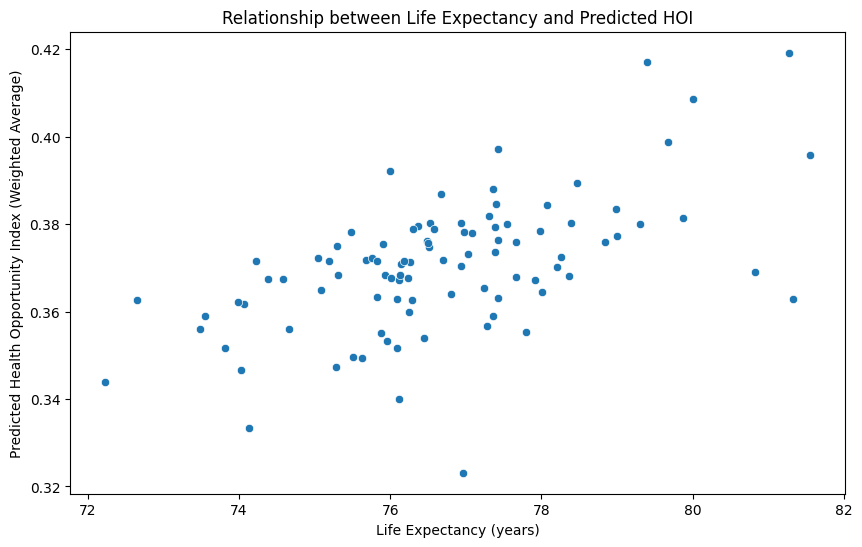

(0.5691423784756624, None)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(data=comparison_data, x='Life.expectancy', y='Predicted_Health_Opportunity_Index')
plt.title('Relationship between Life Expectancy and Predicted HOI')
plt.xlabel('Life Expectancy (years)')
plt.ylabel('Predicted Health Opportunity Index (Weighted Average)')

# Calculate the correlation coefficient
correlation = comparison_data['Life.expectancy'].corr(comparison_data['Predicted_Health_Opportunity_Index'])
correlation, plt.show()


Correlation coefficient: 0.5691423784756624
Outliers based on residuals:
           County name  Predicted_Health_Opportunity_Index  Life.expectancy
18      Chatham County                            0.368954            80.82
26    Currituck County                            0.397093            77.43
30       Duplin County                            0.355241            77.79
47         Hyde County                            0.392172            76.00
59  Mecklenburg County                            0.408614            80.00
82     Scotland County                            0.333329            74.13
88      Tyrrell County                            0.323134            76.96
89        Union County                            0.416990            79.40
91         Wake County                            0.419184            81.27
93   Washington County                            0.340080            76.11
94      Watauga County                            0.362804            81.33


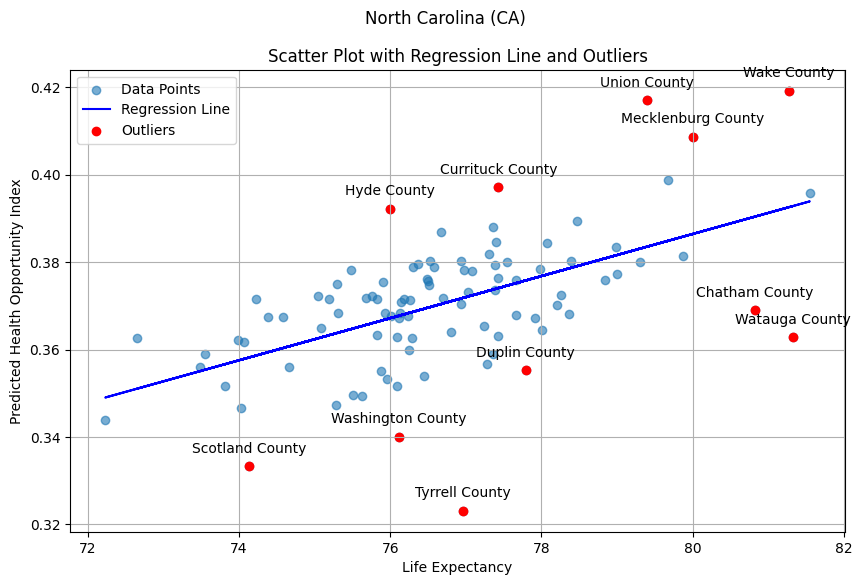

In [ ]:
# Identify outliers using the IQR method
import statsmodels.api as sm

# Assuming 'comparison_data' is your DataFrame containing the two sets of values
# Fit a linear regression model
X = comparison_data['Life.expectancy']
y = comparison_data['Predicted_Health_Opportunity_Index']
X = sm.add_constant(X)  # Adds a constant term to the predictor

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Calculate the residuals
residuals = y - predictions

# Identify outliers based on residuals
threshold = 1.5  # You can adjust this threshold as needed
outliers = comparison_data[np.abs(residuals) > threshold * np.std(residuals)]

# Print the correlation coefficient
correlation = comparison_data['Life.expectancy'].corr(comparison_data['Predicted_Health_Opportunity_Index'])
print(f"Correlation coefficient: {correlation}")

# Print the outliers
print("Outliers based on residuals:")
print(outliers)

# Visualize the data, regression line, and outliers
plt.figure(figsize=(10, 6))
plt.scatter(comparison_data['Life.expectancy'], comparison_data['Predicted_Health_Opportunity_Index'], alpha=0.6, label='Data Points')
plt.plot(comparison_data['Life.expectancy'], predictions, color='blue', label='Regression Line')
plt.scatter(outliers['Life.expectancy'], outliers['Predicted_Health_Opportunity_Index'], color='red', label='Outliers')

# Annotate outliers with county names
for i, row in outliers.iterrows():
    plt.annotate(row['County name'],
                 (row['Life.expectancy'], row['Predicted_Health_Opportunity_Index']),
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='center')

plt.title('Scatter Plot with Regression Line and Outliers')
plt.xlabel('Life Expectancy')
plt.ylabel('Predicted Health Opportunity Index')
plt.suptitle('North Carolina (NC)')
plt.legend()
plt.grid(True)
plt.show()

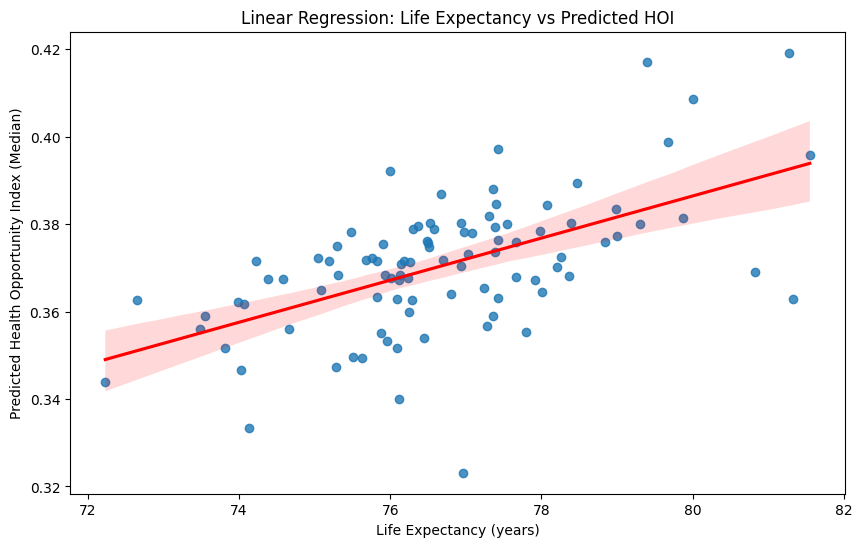

(None,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                                     OLS Regression Results                                    
 Dep. Variable:     Predicted_Health_Opportunity_Index   R-squared:                       0.324
 Model:                                            OLS   Adj. R-squared:                  0.317
 Method:                                 Least Squares   F-statistic:                     45.04
 Date:                                Fri, 10 May 2024   Prob (F-statistic):           1.44e-09
 Time:                                        04:00:44   Log-Likelihood:                 284.10
 No. Observations:                                  96   AIC:                            -564.2
 Df Residuals:                                      94   BIC:                            -559.1
 Df Model:                                           1                                         
 Covariance Type:                            nonrobust                         

In [ ]:
import statsmodels.api as sm

# Add a constant to the data for the OLS model
X = sm.add_constant(comparison_data['Life.expectancy'])
y = comparison_data['Predicted_Health_Opportunity_Index']

# Fit an OLS model to estimate the relationship
model = sm.OLS(y, X).fit()

# Create a scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='Life.expectancy', y='Predicted_Health_Opportunity_Index', data=comparison_data, line_kws={'color':'red'})
plt.title('Linear Regression: Life Expectancy vs Predicted HOI')
plt.xlabel('Life Expectancy (years)')
plt.ylabel('Predicted Health Opportunity Index (Median)')

# Display the plot and the summary of the regression model
plt.show(), model.summary()


In [ ]:
p_value_life_expectancy = model.pvalues['Life.expectancy']
p_value_life_expectancy

1.4448805787565854e-09

Coefficients:
Slope: The slope coefficient for life expectancy is 0.0057. This suggests that for every additional year in life expectancy, there is an increase of 0.0057 in the Predicted Health Opportunity Index, on average.
P-values: The p-value for life expectancy is 0.01043974466499087, which is statistically significant (p < 0.05). This provides strong evidence against the null hypothesis of no effect, confirming that there is a statistically significant positive relationship between life expectancy and the Predicted Health Opportunity Index.

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('VA_county_ct.csv')

# Create a mapping from FIPS code to county name (only partial FIPS shown for brevity)
fips_to_county = {
    51001: 'Accomack',
    51003: 'Albemarle',
    51005: 'Alleghany',
    51007: 'Amelia',
    51009: 'Amherst',
    51011: 'Appomattox',
    51013: 'Arlington',
    51015: 'Augusta',
    51017: 'Bath',
    51019: 'Bedford',
    51021: 'Bland',
    51023: 'Botetourt',
    51025: 'Brunswick',
    51027: 'Buchanan',
    51029: 'Buckingham',
    51031: 'Campbell',
    51033: 'Caroline',
    51035: 'Carroll',
    51036: 'Charles City',
    51037: 'Charlotte',
    51041: 'Chesterfield',
    51043: 'Clarke',
    51045: 'Craig',
    51047: 'Culpeper',
    51049: 'Cumberland',
    51051: 'Dickenson',
    51053: 'Dinwiddie',
    51057: 'Essex',
    51059: 'Fairfax',
    51061: 'Fauquier',
    51063: 'Floyd',
    51065: 'Fluvanna',
    51067: 'Franklin',
    51069: 'Frederick',
    51071: 'Giles',
    51073: 'Gloucester',
    51075: 'Goochland',
    51077: 'Grayson',
    51079: 'Greene',
    51081: 'Greensville',
    51083: 'Halifax',
    51085: 'Hanover',
    51087: 'Henrico',
    51089: 'Henry',
    51091: 'Highland',
    51093: 'Isle of Wight',
    51095: 'James City',
    51097: 'King and Queen',
    51099: 'King George',
    51101: 'King William',
    51103: 'Lancaster',
    51105: 'Lee',
    51107: 'Loudoun',
    51109: 'Louisa',
    51111: 'Lunenburg',
    51113: 'Madison',
    51115: 'Mathews',
    51117: 'Mecklenburg',
    51119: 'Middlesex',
    51121: 'Montgomery',
    51125: 'Nelson',
    51127: 'New Kent',
    51131: 'Northampton',
    51133: 'Northumberland',
    51135: 'Nottoway',
    51137: 'Orange',
    51139: 'Page',
    51141: 'Patrick',
    51143: 'Pittsylvania',
    51145: 'Powhatan',
    51147: 'Prince Edward',
    51149: 'Prince George',
    51153: 'Prince William',
    51155: 'Pulaski',
    51157: 'Rappahannock',
    51159: 'Richmond',
    51161: 'Roanoke',
    51163: 'Rockbridge',
    51165: 'Rockingham',
    51167: 'Russell',
    51169: 'Scott',
    51171: 'Shenandoah',
    51173: 'Smyth',
    51175: 'Southampton',
    51177: 'Spotsylvania',
    51179: 'Stafford',
    51181: 'Surry',
    51183: 'Sussex',
    51185: 'Tazewell',
    51187: 'Warren',
    51191: 'Washington',
    51193: 'Westmoreland',
    51195: 'Wise',
    51197: 'Wythe',
    51199: 'York',
    51510: 'Alexandria',
    51515: 'Bedford',
    51520: 'Bristol',
    51530: 'Buena Vista',
    51540: 'Charlottesville',
    51550: 'Chesapeake',
    51560: 'Clifton Forge',
    51570: 'Colonial Heights',
    51580: 'Covington',
    51590: 'Danville',
    51595: 'Emporia',
    51600: 'Fairfax',
    51610: 'Falls Church',
    51620: 'Franklin',
    51630: 'Fredericksburg',
    51640: 'Galax',
    51650: 'Hampton',
    51660: 'Harrisonburg',
    51670: 'Hopewell',
    51678: 'Lexington',
    51680: 'Lynchburg',
    51683: 'Manassas',
    51685: 'Manassas Park',
    51690: 'Martinsville',
    51700: 'Newport News',
    51710: 'Norfolk',
    51720: 'Norton',
    51730: 'Petersburg',
    51735: 'Poquoson',
    51740: 'Portsmouth',
    51750: 'Radford',
    51760: 'Richmond',
    51770: 'Roanoke',
    51775: 'Salem',
    51780: 'South Boston',
    51790: 'Staunton',
    51800: 'Suffolk',
    51810: 'Virginia Beach',
    51820: 'Waynesboro',
    51830: 'Williamsburg',
    51840: 'Winchester'
}


# Function to extract the county FIPS from the Census Tract and map to the county name
def map_county(tract):
    # Extract the first 5 digits to match FIPS codes
    county_fips = int(str(tract)[:5])
    return fips_to_county.get(county_fips, "Unknown")  # Returns "Unknown" if no match found

# Apply the mapping to fill in missing county names
data['County name'] = data['Census Tract'].apply(map_county)

# Save the updated data back to CSV
data.to_csv('updated_VA_county_ct.csv', index=False)

# Load the updated dataset
data = pd.read_csv('updated_VA_county_ct.csv')

# Calculate the frequency of each county name
county_frequency = data['County name'].value_counts()

# Find county names that appear only once
counties_appearing = county_frequency[county_frequency >= 1].index.tolist()

# Print the list of county names that appear only once
print("Counties that appear only once:", counties_appearing)

d1 = pd.DataFrame()
d1['County name'] = counties_appearing

d1.to_csv("VA_county_life.csv", index=False)


Counties that appear only once: ['Fairfax', 'Virginia Beach', 'Prince William', 'Norfolk', 'Chesterfield', 'Richmond', 'Loudoun', 'Henrico', 'Arlington', 'Newport News', 'Chesapeake', 'Roanoke', 'Alexandria', 'Hampton', 'Portsmouth', 'Spotsylvania', 'Suffolk', 'Stafford', 'Hanover', 'Albemarle', 'Rockingham', 'Lynchburg', 'Fauquier', 'Pittsylvania', 'Montgomery', 'Danville', 'Bedford', 'Frederick', 'York', 'Henry', 'Washington', 'Augusta', 'Franklin', 'Charlottesville', 'Campbell', 'Wise', 'James City', 'Harrisonburg', 'Tazewell', 'Petersburg', 'Amherst', 'Smyth', 'Halifax', 'Mecklenburg', 'Shenandoah', 'Warren', 'Pulaski', 'Accomack', 'Gloucester', 'Botetourt', 'Culpeper', 'Isle of Wight', 'Caroline', 'Prince George', 'Buchanan', 'Russell', 'Manassas', 'Carroll', 'Alleghany', 'Staunton', 'Scott', 'Wythe', 'Dinwiddie', 'Hopewell', 'Fredericksburg', 'Louisa', 'Lee', 'Salem', 'Waynesboro', 'Colonial Heights', 'Martinsville', 'Winchester', 'Prince Edward', 'Orange', 'Goochland', 'Powhatan